# PROYECTO FINAL - TRATAMIENTO DE DATOS

#### REALIZADO POR:
Alejandro Mesquida Jiménez - 100429586@alumnos.uc3m.es


José María Iranzo González - 100406233@alumnos.uc3m.es



En este proyecto se aborda el análisis y tratamiento de datos textuales a través de diversas técnicas y metodologías.

Se comenzará con un análisis detallado de las variables de entrada para visualizar las relaciones entre la variable de salida y las categorías en la variable `categories`. A continuación, se implementará un pipeline para el preprocesamiento de textos utilizando librerías como *NLTK*, *Gensim* y *SpaCy*.

Se procederá a la representación vectorial de los documentos mediante tres métodos diferentes: *TF-IDF*, *Word2Vec* y embeddings contextuales basados en transformers (*BERT*). Luego, se entrenarán y evaluarán modelos de regresión usando técnicas de machine learning como redes neuronales en *PyTorch* y modelos de *Scikit-learn* como *Random Forest*.

Finalmente, se compararán los resultados obtenidos con el fine-tuning de un modelo preentrenado utilizando *Hugging Face*. Como tarea extra, se implementarán un summarizer para reducir la longitud de los textos de la variable `description` y un clustering de diferentes variables para explorar patrones ocultos en los datos.








## 0. Preparación de datos e importación de bibliotecas

Para llevar a cabo el análisis y la implementación del proyecto, se utilizarán diversas librerías de Python, cada una con un rol específico en el proceso.

Desde las herramientas para el preprocesamiento de texto como NLTK y SpaCy, hasta las librerías de modelado y representación vectorial como Gensim, PyTorch y Hugging Face, estas bibliotecas proporcionan las capacidades necesarias para manejar, transformar y analizar los datos textuales, así como para entrenar y evaluar modelos de machine learning avanzados..

In [ ]:
!pip install nltk gensim spacy transformers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Preparativos Iniciales


Cargar el conjunto de datos proporcionado (`full_format_recipes.json`) desde el Google Drive.

Es necesario que ajuste la ruta a donde tenga alojado el archivo anteriormente descrito.

In [ ]:
# Montamos GDrive en el Notebook para poder acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

# Volvemos a montar en caso de que hayamos hecho algún cambio en GDrive
drive.mount("/content/drive", force_remount=True)

# Path a nuestra carpeta de datos
path_file = '/content/drive/MyDrive/TratamientoDatos/Proyecto/full_format_recipes.json' # Colab

import pandas as pd

datos=pd.read_json(path_file)
datos.head()

Mounted at /content/drive
Mounted at /content/drive


,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


Un problema al que nos hemos enfrentado es que en el dataset hay filas completamente vacías, para solucionarlo, hemos optado por deshacernos de ellas, para así poder trabajar con el conjunto de datos.

In [ ]:
nan_rows = datos[datos['directions'].isna()]
print(nan_rows)

      directions  fat date categories  calories desc  protein  rating title  \
1076         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
1135         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
1907         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
5146         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
5424         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
5558         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
7607         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
7768         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
7881         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
8177         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
9590         NaN  NaN  NaT        NaN       NaN  NaN      NaN     NaN   NaN   
10085        NaN  NaN  NaT        NaN       NaN  NaN

Eliminamos las entradas vacias:

In [ ]:
datos = datos.dropna(subset=['directions'])

## 1. Análisis de las variables de entrada

*Visualice la relación entre la variable de salida y algunas de las categorías en la variable categories y explique su potencial relevancia en el problema.*

### 1.1. Desgranamos las diferentes columnas de nuestro dataset

In [ ]:
directions=datos['directions']    # directions:  Instrucciones para hacer la receta
categories=datos['categories']    # categories:  Distintas categorías que se asignan al plato.
desc=datos['desc']                # desc:        Descripción.
title=datos['title']              # title:       Título de la publicación.
#------------------------------------------------------------------------------#
rating=datos['rating']            # rating:      Puntuación dada por usuarios.
fat=datos['fat']                  # fat:         Cantidad de grasa en gramos.
protein=datos['protein']          # protein:     Cantidad de proteínas en gramos.
ingredients=datos['ingredients']  # ingredients: Cantidad de cada ingrediente.
sodium=datos['sodium']            # sodium:      Cantidad de sodio en gramos.
calories=datos['calories']        # calories:    Cantidad de calorías en gramos.
date=datos['date']                # date:        Fecha de publicación.

In [ ]:
print("Las columnas que contienen texto son: ")
print(datos.select_dtypes(include=['object']).columns)

print("Las columnas que tienen información numérica son: ")
print(datos.select_dtypes(include=['number']).columns)

Las columnas que contienen texto son: 
Index(['directions', 'categories', 'desc', 'title', 'ingredients'], dtype='object')
Las columnas que tienen información numérica son: 
Index(['fat', 'calories', 'protein', 'rating', 'sodium'], dtype='object')


En primer lugar, decidimos obtener un contador de cuantas veces aparecía cada categoría, para así poder tener esto en cuenta a la hora de analizar los datos.

In [ ]:
from collections import Counter # Es una clase de la biblioteca collections que cuenta la frecuencia de cada elemento en un iterable.

# Supongamos que ya cargaste el DataFrame 'datos'
# Convertir la columna categories a una lista de todas las categorías, ignorando valores nulos o no iterables

#Se crea una lista 'all_categories' que contiene todas las categorías individuales de todas las recetas.
all_categories = [
      # Accede a la columna categories del DataFrame.
      # Cada fila contiene una lista de categorías asociadas a esa receta
      # (o puede tener valores nulos o no iterables).
    category for sublist in datos['categories']

      # Comprueba si el elemento de la fila es una lista válida antes de
      # intentar iterar sobre él, evitando errores.
    if isinstance(sublist, list)
    for category in sublist
]

# Contar las ocurrencias de cada categoría
category_counts = Counter(all_categories)

# Convertir el resultado a un DataFrame para visualización ordenada (opcional)
category_counts_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count'])
category_counts_df = category_counts_df.sort_values(by='Count', ascending=False)

#Cargar aquellas que se repitan más de 0 veces (podemos cambiar este valor para mostrar por ejemplo solo las que aparecen 500 veces)
category_counts_df = category_counts_df[category_counts_df['Count'] > 0]

# Mostrar el resultado
print(category_counts_df)

               Count
Bon Appétit     9355
Peanut Free     8390
Soy Free        8088
Tree Nut Free   7044
Vegetarian      6846
...              ...
Aspen              1
Beverly Hills      1
Yonkers            1
West Virginia      1
Sourdough          1

[674 rows x 1 columns]


### 1.2. Implementación del análisis



El análisis que decidimos analizar fue como la media de la variable 'rating' variaba en función de la categoría de la receta, pudiendo así observar que categorías son puntuadas mejor que otras. Ordenando las categorías que obtenían una mejor puntuación, obtenemos los siguientes resultados:

In [ ]:
# Expandir las categorías en filas separadas
df_expanded = datos.explode('categories')

# Calcular el promedio por categoría
avg_ratings = df_expanded.groupby('categories')['rating'].mean()

#Ordenarlas de mejores a peores
avg_ratings_sort = avg_ratings.sort_values(ascending=False).reset_index()
avg_ratings_sort.columns = ['Category', 'Average Rating']


# Mostrar resultados
print(avg_ratings_sort)

              Category  Average Rating
0    Mortar and Pestle             5.0
1           #WasteLess             5.0
2       Emeril Lagasse             5.0
3         Suzanne Goin             5.0
4                  Rub             5.0
..                 ...             ...
669            Camping             0.0
670             Waffle             0.0
671             Caviar             0.0
672             Quiche             0.0
673             Sorbet             0.0

[674 rows x 2 columns]


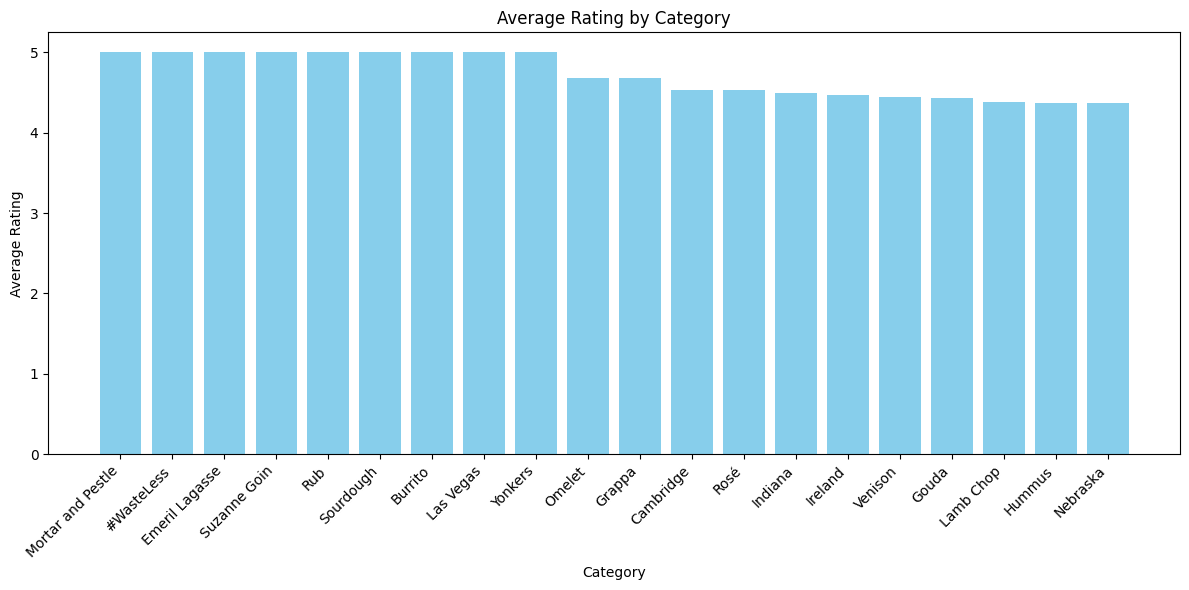

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las 10 categorías más relevantes
top_categories2 = avg_ratings_sort.head(20)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_categories2['Category'], top_categories2['Average Rating'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Sin embargo, si nos fijamos en algunas de las categorías que obtienen mejor puntuación, podemos darnos cuenta de que aparecen muy pocas veces. Vamos a mostralo para las categorías 'Mortar and Pestle' y '#Wastless':

In [ ]:
# Filtrar las filas donde '#WasteLess' está en la lista de categorías
wasteless_rows = datos[datos['categories'].apply(lambda x: isinstance(x, list) and '#WasteLess' in x)]

# Imprimir como tabla
wasteless_rows

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
9816,"[Combine carrots, butter, orange juice, honey,...",8.0,2015-12-08 16:23:45.034000+00:00,"[Carrot, Root Vegetable, Side, Dinner, Kid-Fri...",186.0,"Dark honeys, like buckwheat, bring a touch of ...",3.0,5.0,Honey-Glazed Carrots with Carrot Top Gremolata,[4 3/4–5 pounds small carrots with tops (about...,197.0


In [ ]:
mortar_and_pestle_rows = datos[datos['categories'].apply(lambda x: isinstance(x, list) and 'Mortar and Pestle' in x)]

mortar_and_pestle_rows

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
6999,"[Bring salt, sugar, and 2 quarts water to a bo...",62.0,2013-11-06 04:00:00+00:00,"[Poultry, turkey, Roast, Christmas, Thanksgivi...",1006.0,None,60.0,5.0,Boudin Blanc-Stuffed Turkey Breasts with Chest...,"[1/2 cup kosher salt, 1/4 cup sugar, 1/4 cup s...",6156.0
17558,[Grind star anise and coriander seeds in spice...,NaN,2015-07-30 04:00:00+00:00,"[Pork, Roast, Kid-Friendly, Mortar and Pestle,...",NaN,"If you're short on time or refrigerator space,...",NaN,5.0,Roast Pork Shoulder with Star Anise and Soy Sa...,"[4 star anise pods, 1 tablespoon coriander see...",NaN


Las categorías 'Mortar and Pestle' y '#Wastless' aparecen 2 y 1 veces respectivamente, por lo que estos datos no son muy representativos del dataset completo. Por ello, como hemos comprobado anteriormente que algunas de las categorías tienen miles de apariciones en el dataset, vamos a escoger un límite de 500 apariciones, y representar la media de los ratings solo para categorías que aparezcan más de 500 veces en el dataset.

In [ ]:
# Contar la frecuencia de cada categoría
category_counts = df_expanded['categories'].value_counts()

# Filtrar las categorías que aparecen más de 500 veces
valid_categories = category_counts[category_counts > 500].index

# Filtrar el DataFrame solo con las categorías válidas
df_filtered = df_expanded[df_expanded['categories'].isin(valid_categories)]

# Calcular el promedio por categoría
avg_ratings2 = df_filtered.groupby('categories')['rating'].mean()

# Contar el número de ocurrencias de cada categoría
category_count2 = df_filtered.groupby('categories').size()

# Combinar los resultados en un solo DataFrame
df_500 = pd.DataFrame({
    'Average Rating': avg_ratings2,
    'Count': category_count2
})

# Ordenar por la valoración promedio de mayor a menor
df_500_sort = df_500.sort_values(by='Average Rating', ascending=False).reset_index()

# Mostrar resultados
print(df_500_sort)

         categories  Average Rating  Count
0             Roast        4.085701   1320
1             Mixer        4.016865    630
2          Marinate        4.000624    601
3        High Fiber        3.992473   1013
4              Beef        3.985820    811
..              ...             ...    ...
98           Yogurt        3.520360    528
99            Party        3.510370    892
100  Cocktail Party        2.952231   1154
101           Drink        2.362580   1087
102       Alcoholic        2.268713    835

[103 rows x 3 columns]


La categoría 'Bon Appéttit' que aparecía con mayor frecuencia aparece en el Top 29 de rating de las categorías que aparecen más de 500 veces.

In [ ]:
# Filtrar los resultados para la categoría 'Bon Appétit'
bon_appetit_result = df_500_sort[df_500_sort['categories'] == 'Bon Appétit']

# Mostrar el resultado
print(bon_appetit_result)

     categories  Average Rating  Count
29  Bon Appétit        3.893038   9355


Representamos las 20 mejores y 20 peores categorías que aparecen más de 500 veces.

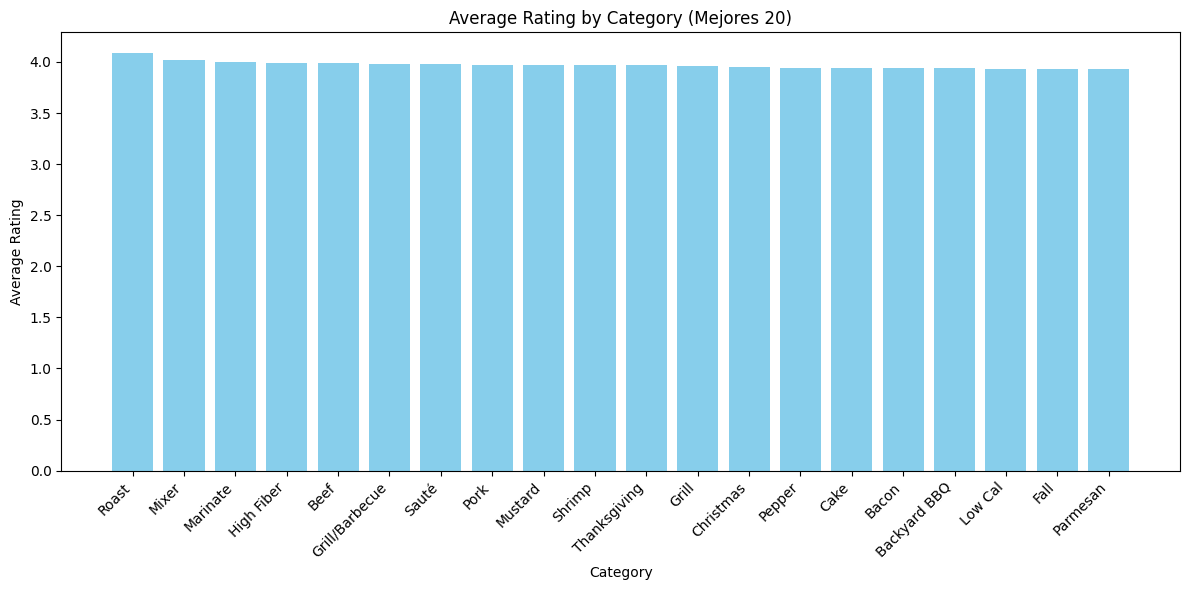

In [ ]:
# Seleccionar las 10 categorías más relevantes
top_categories3 = df_500_sort.head(20)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_categories3['categories'], top_categories3['Average Rating'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category (Mejores 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

De las categorías más positivas podemos destacar las categorías Cake, Thanksgiving, Christmas, Low Cal, Shrimp, Roast, Grill/Barbecue, Sauté, Beef, Pork, Marinate, Mixer, y Backyard BBQ.

Por un lado, las categorías Cake, Thanksgiving, Christmas y Backyard BBQ están asociadas con celebraciones especiales y eventos festivos, lo que las hace más atractivas. Las tartas y las comidas típicas de estas festividades son generalmente bien recibidas y tienen un alto índice de satisfacción, especialmente en reuniones familiares o eventos especiales, lo que podría resultar en ratings positivos.

Por otro lado, las categorías relacionadas con técnicas de cocción como Roast, Grill/Barbecue, Grill, Sauté, y Marinate son populares porque permiten resaltar sabores intensos y cocinar platos sabrosos. Estas técnicas son conocidas por producir resultados deliciosos y bien valorados, especialmente cuando se preparan carnes como Beef, Pork, o mariscos como Shrimp.

Además, las categorías Low Cal y High Fiber están ganando popularidad entre aquellos que buscan opciones más saludables y equilibradas, lo que también contribuye a ratings positivos. Las personas que siguen dietas controladas en calorías o ricas en fibra suelen valorar positivamente recetas que ofrecen beneficios para la salud sin sacrificar el sabor.

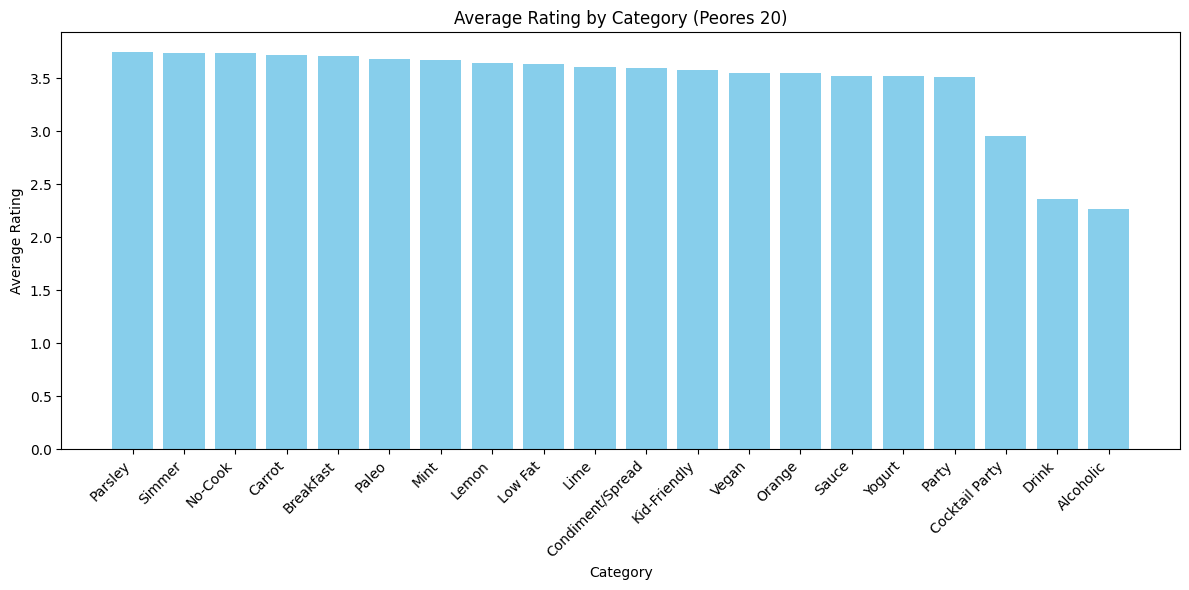

In [ ]:
# Seleccionar las 10 categorías más relevantes
worst_categories = df_500_sort.tail(20)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(worst_categories['categories'], worst_categories['Average Rating'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category (Peores 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

De las categorías más negativas podemos destacar las categorías Mint, Lemon, Lime, Orange, No-Cook, Sauce, Breakfast, Kid-Friendly, Party, Cocktail Party, Drink, Alcoholic y Party.

Por un lado, las categorías Mint, Lemon, Lime y Orange están relacionadas con sabores frescos y ácidos, los cuales no suelen gustar a todo el mundo, consiguiendo así ratings más bajos. Sin embargo, estos rating siguen estando entorno a 3.5, por lo que podría deberse a que algunas personas les dan un rating muy alto y otras muy bajo, quedandose la media en un punto intermedio.

Por otro lado, las categorías relacionadas con la fiesta, como pueden ser Party, Cocktail Party, Drink, Alcoholic y Party también obtienen ratings más bajos. Esto podría ser debido a factores relacionados con la salud, las preferencias dietéticas o aplicabilidad en la vida cotidiana.

Finalmente, otro punto que tienen en común todas estas categorias es que son sencillas y rápidas de hacer, por lo que parece que la mayoría prefieren recetas más elaboradas.

## 2. Implementación de un pipeline para el preprocesado de los textos.

De la misma forma que hicimos en clase, antes de continuar con la tarea de vectorización, debemos estructurar y limpiar el texto para conservar únicamente la información que nos permita capturar el contenido semántico del corpus. Esto mejorará el resultado de nuestros embeddings.

Para este propósito, aplicaremos los siguientes cuatro pasos, que son típicos en cualquier tarea de procesamiento de lenguaje natural (NLP):

1.   Manipulación del texto (Text Wrangling)  
2.   Tokenización  
3.   Homogeneización  
4.   Limpieza  

Para los próximos pasos, utilizaremos algunos métodos disponibles en:

*   [Natural Language Toolkit (NLTK)](https://www.nltk.org/)  
*   [Beautiful Soup](https://pypi.org/project/beautifulsoup4/)  
*   [Contractions](https://pypi.org/project/contractions/)  
*   [re — Operaciones con expresiones regulares](https://docs.python.org/3/library/re.html)  

In [ ]:
import re
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

def check_nltk_packages():
  packages = ['punkt','stopwords','omw-1.4','wordnet']

  for package in packages:
    try:
      nltk.data.find('tokenizers/' + package)
    except LookupError:
      nltk.download(package)
check_nltk_packages()

try:
  import lxml
except ModuleNotFoundError:
  %pip install lxml

try:
  import contractions
except ModuleNotFoundError:
  %pip install contractions
  import contractions

from bs4 import BeautifulSoup
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 645.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.5 MB/s eta 0:00:00


Para estructurar y limpiar el texto, definimos esta función, que ejecuta los 4 pasos mencionados anteriormente. En esta función, primero se eliminan urls y etiquetas html con BeautifulSoup, después se expanden las contraciones y se tokenizan las palabras y los signos de puntuación, y finalemnte se eliminan los signos de puntuación, las stopwords y se lematizan los tokens.

In [ ]:
def prepare_data(text):
  soup = BeautifulSoup(text, "lxml")
  clean_text = soup.get_text()
  clean_text = re.sub(r'https://\S+|www\.\S+', '', clean_text)
  clean_text = contractions.fix(clean_text)
  review_tokens = wordpunct_tokenize(clean_text)
  review_tokens_filtered = [token.lower() for token in review_tokens if token.isalnum()]
  lemmatized_review = [wnl.lemmatize(el) for el in review_tokens_filtered]
  clean_review = [token for token in lemmatized_review if token not in stopwords_en]
  return clean_review

def prepare_data_list(text_list):
    return [prepare_data(text) for text in text_list]

datos['clean_directions'] = datos['directions'].apply(prepare_data_list)

#datos['clean_directions'] = datos['directions'].apply(prepare_data)

<ipython-input-19-b29c87ce2644>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "lxml")


Como se puede observar, ahora hemos añadido una nueva columna al dataframe en la que aparece el texto de la columna 'directions' preprocesado y tokenizado.

In [ ]:
datos.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,clean_directions
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0,"[[1, place, stock, lentil, celery, carrot, thy..."
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0,"[[combine, first, 9, ingredient, heavy, medium..."
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0,"[[large, heavy, saucepan, cook, diced, fennel,..."
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,"[[heat, oil, heavy, large, skillet, medium, hi..."
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0,"[[preheat, oven, 350, f, lightly, grease, 8x8x..."


### Ejemplo

In [ ]:
datos['directions'][0]

['1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool.',
 '2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper.',
 '3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.']

In [ ]:
datos['clean_directions'][0]

[['1',
  'place',
  'stock',
  'lentil',
  'celery',
  'carrot',
  'thyme',
  'salt',
  'medium',
  'saucepan',
  'bring',
  'boil',
  'reduce',
  'heat',
  'low',
  'simmer',
  'lentil',
  'tender',
  '30',
  'minute',
  'depending',
  'lentil',
  'begin',
  'dry',
  'add',
  'water',
  'needed',
  'remove',
  'discard',
  'thyme',
  'drain',
  'transfer',
  'mixture',
  'bowl',
  'let',
  'cool'],
 ['2',
  'fold',
  'tomato',
  'apple',
  'lemon',
  'juice',
  'olive',
  'oil',
  'season',
  'pepper'],
 ['3',
  'assemble',
  'wrap',
  'place',
  '1',
  'lavash',
  'sheet',
  'clean',
  'work',
  'surface',
  'spread',
  'lentil',
  'mixture',
  'end',
  'nearest',
  'leaving',
  '1',
  'inch',
  'border',
  'top',
  'several',
  'slice',
  'turkey',
  'lettuce',
  'roll',
  'lavash',
  'slice',
  'crosswise',
  'serve',
  'using',
  'tortilla',
  'spread',
  'lentil',
  'center',
  'top',
  'turkey',
  'lettuce',
  'fold',
  'bottom',
  'left',
  'side',
  'right',
  'side',
  'rolli

Nos quedamos con las 2000 primeras recetas ya que  si no, el tiempo de entrenamiento de las redes neuronales es demasiado extenso.

Aunque en este punto del código pone que reducimos el dataset a las primeras 2000, para los pasos 2 (Implementación de un pipeline para el preprocesado de los textos) y 3 (Representación vectorial de los documentos mediante TF-IDF y Word2Vec) se usó el dataset completo con las 20,000 recetas, mientras que, para la representación de embeddings contextuales calculados a partir de modelos basados en transformers y para los siguientes apartados, se redujo el tamaño del dataset para que las ejecuciones no fueran exageradamente largas.

In [ ]:
datos = datos.head(2000)
len(datos)

## 3. Representación Vectorial

Representación vectorial de los documentos mediante tres procedimientos
diferentes. Como se mencionó anteriormente, para TF-IDF y Word2Vec se usaron las 20,000 recetas, mientras que para la representación de los embeddings contextuales con BERT se usó un dataset reducido de 2,000 recetas.

En primer lugar, dado que las funciones encargadas de crear las representaciones vectoriales esperan un único texto como entrada, y nosotros tenemos una lista de pasos en cada fila de la columna 'descriptions', debemos juntar esa lista de pasos en un único texto, que será la receta completa.

In [ ]:
from termcolor import colored
corpus = datos['clean_directions']
# Aplanar la lista de listas en una sola lista
corpus_flat = corpus.apply(lambda x: [item for sublist in x for item in sublist])
print(colored('Number of documents in corpus: '+str(len(corpus)), 'green'))
print(colored('\n============= First review =============', 'blue'))
print(corpus_flat[0])
print(colored('\n============= Second review =============', 'blue'))
print(corpus_flat[1])

Number of documents in corpus: 2000

============= First review =============
['1', 'place', 'stock', 'lentil', 'celery', 'carrot', 'thyme', 'salt', 'medium', 'saucepan', 'bring', 'boil', 'reduce', 'heat', 'low', 'simmer', 'lentil', 'tender', '30', 'minute', 'depending', 'lentil', 'begin', 'dry', 'add', 'water', 'needed', 'remove', 'discard', 'thyme', 'drain', 'transfer', 'mixture', 'bowl', 'let', 'cool', '2', 'fold', 'tomato', 'apple', 'lemon', 'juice', 'olive', 'oil', 'season', 'pepper', '3', 'assemble', 'wrap', 'place', '1', 'lavash', 'sheet', 'clean', 'work', 'surface', 'spread', 'lentil', 'mixture', 'end', 'nearest', 'leaving', '1', 'inch', 'border', 'top', 'several', 'slice', 'turkey', 'lettuce', 'roll', 'lavash', 'slice', 'crosswise', 'serve', 'using', 'tortilla', 'spread', 'lentil', 'center', 'top', 'turkey', 'lettuce', 'fold', 'bottom', 'left', 'side', 'right', 'side', 'rolling', 'away']

============= Second review =============
['combine', 'first', '9', 'ingredient', 'heavy'

### 3.1. Representación TF-IDF
TF-IDF (Term Frequency-Inverse Document Frequency) genera una representación basada en el peso de las palabras en los documentos, considerando su frecuencia relativa en el corpus.

###  Bag-Of-Words (BoW)

Para poder generar la representación TF-IDF de nuestras palabras, primero debemos generar una representación Bag-Of-Words que será introducida como entrada a la función TfidfModel de Gensim. Para ello, en primer lugar, definimos nuestro diccionario, que contendrá todos los tokens que aparecen en nuestro corpus.

In [ ]:
from gensim.corpora import Dictionary

# Create dictionary of tokens
D = Dictionary(corpus_flat)
n_tokens = len(D)

print('The positive dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The positive dictionary contains 9159 terms
First terms in the dictionary:
0 : 1
1 : 2
2 : 3
3 : 30
4 : add
5 : apple
6 : assemble
7 : away
8 : begin
9 : boil


Una vez hemos definido nuestro diccionario, podemos generar nuestra representación BOW de las recetas, que no es más que contar la frecuencia con la que cada palabra aparece en una receta. Como se puede observar, los vectores contienen el identificador númerico de cada palabra con su respectiva frecuencia de aparcición en el documento.

In [ ]:
reviews_bow = [D.doc2bow(doc) for doc in corpus_flat]

n_review = 1000
print(colored('============= Review (lemmas) =============', 'blue'))
print(' '.join(corpus_flat[n_review]))

print(colored('\n============= Sparse vector representation =============', 'blue'))
print(reviews_bow[n_review])

print(colored('\n============= Word counts for the review =============', 'blue'))
print(list(map(lambda x: (D[x[0]], x[1]), reviews_bow[n_review])))

============= Review (lemmas) =============
1 heat oil butter pot low heat add onion cook stirring 10 minute add garlic cook 2 minute sprinkle flour tarragon cook stirring constantly 1 2 minute 2 add carrot potato apple broth bring boil reduce heat gentle simmer cook partially covered vegetable tender 20 minute add pea dill tomato chicken season taste salt pepper cook 5 minute 3 preheat oven 350 f spoon mixture 2 quart round ovenproof casserole lightly floured surface roll puff pastry form circle 2 inch larger casserole brush egg wash around inside outside rim casserole lay pastry top trim overhang 1 inch crimp edge around rim seal cut several slit pastry release steam brush remaining egg wash bake crust golden 40 45 minute

============= Sparse vector representation =============
[(0, 3), (1, 5), (2, 1), (4, 4), (5, 1), (9, 1), (13, 1), (14, 1), (26, 3), (27, 2), (36, 1), (38, 6), (39, 1), (42, 1), (44, 1), (46, 1), (49, 1), (51, 1), (53, 1), (55, 1), (58, 1), (62, 1), (63, 1), (65, 1

Una vez generada nuestra representación BOW, pasamos a generar la representación TF-IDF:

In [ ]:
from gensim.models import TfidfModel

tfidf = TfidfModel(reviews_bow)

Como se puede observar, los vectores contienen el identificador númerico de cada palabra con su respectivo valor TF-IDF, que se basa en el peso de las palabras en los documentos, considerando su frecuencia relativa en el corpus.

In [ ]:
reviews_tfidf = tfidf[reviews_bow]
n_project = 1000
print(colored('============= TFIDF representation for the project =============', 'blue'))
print(reviews_tfidf[n_review])

print(colored('\n============= TFIDF applying the transformation only to the document =============', 'blue'))
print(tfidf[reviews_bow[n_review]])

============= TFIDF representation for the project =============
[(0, 0.02675411414854839), (1, 0.06085334444011119), (2, 0.02227286222484661), (4, 0.04877359136555617), (5, 0.10356732969855789), (9, 0.036589595750547835), (13, 0.03693829614946036), (14, 0.0854405780150875), (26, 0.04294030033745054), (27, 0.06155575081116355), (36, 0.049945038405434475), (38, 0.036418117336609), (39, 0.024701104183792955), (42, 0.02381265913539904), (44, 0.02000182233845874), (46, 0.05365877866525743), (49, 0.07835534199942011), (51, 0.010723850177520589), (53, 0.031480569893324324), (55, 0.11174518028511693), (58, 0.038722119237129204), (62, 0.06686749850105624), (63, 0.03830486998148763), (65, 0.06317243728846274), (66, 0.03709114659796759), (77, 0.03098239664080326), (82, 0.14907871378372792), (85, 0.043021435607977956), (89, 0.03687229607780936), (96, 0.15073940650696357), (103, 0.10297583359048887), (105, 0.03047568021509675), (108, 0.055312846090507704), (119, 0.13461037654585967), (128, 0.04235

Sin embargo, estos vectores tienen una longitud distinta en función del número de tokens de cada documento. Por ello, para que posteriormente nuestras redes neuronales tengan una entrada de tamaño constante, generamos el vector TF-IDF denso, que rellena con valor 0 para el resto de palabras que no aparecen en ese documento. De esta forma, conseguimos que todos los vectores TF-IDF tengan una longitud igual a la longitud del diccionario.

In [ ]:
len(reviews_tfidf[n_review])

87

In [ ]:
from gensim.matutils import sparse2full

# Obtener el tamaño del diccionario
vocab_size = len(D)

# Convertir todos los documentos de TF-IDF dispersos a densos
dense_tfidf_matrix = [sparse2full(doc, vocab_size) for doc in reviews_tfidf]

### 3.2. Representación Word2Vec


Word2Vec es un modelo que representa palabras como vectores densos en un espacio de alta dimensión, donde palabras con significados similares están cerca unas de otras.

Para ello, utilizamos la función Word2Vec de Gensim, introduciendo el corpus de documentos, un tamaño de vector de 200, una ventana de 5 y un contador mínimo de 5. De esta forma, cada vector word2vec de cada palabra tendrá una longitud = 200, y para generar dicho vector el modelo considerará 5 palabras a la izquierda y 5 palabras a la derecha de la palabra objetivo para aprender relaciones contextuales. Además, solo se utilizan palabras que aparezcan más de 5 veces en nuestro corpus.

In [ ]:
from gensim.models import Word2Vec
# Entrenar el modelo Word2Vec
model_w2v = Word2Vec(sentences=corpus_flat, vector_size=200, window=5, min_count=5, seed=42)

Una vez que el modelo está entrenado, se puede acceder a él a través del atributo wv, que es el modelo real de vectores de palabras.

Podemos ver el vocabulario aprendido por el modelo a través del diccionario key_to_index, es decir, las palabras objetivo para las cuales hemos calculado un embedding, así como los embeddings correspondientes para estas palabras, de la siguiente manera:

In [ ]:
print(colored('\n============= Word2Vec vocabulary =============', 'blue'))
words = list(model_w2v.wv.key_to_index)
print(words[0:50])
print(colored('\n============= Embedding of the first word =============', 'blue'))
print(model_w2v.wv[words[0]])


============= Word2Vec vocabulary =============
['1', 'minute', '2', 'heat', 'add', 'bowl', 'salt', 'medium', 'large', 'mixture', 'pepper', '4', '3', 'cup', 'oil', 'water', 'transfer', 'stir', 'pan', 'cook', 'inch', 'remaining', 'oven', 'stirring', 'tablespoon', 'cover', 'side', 'butter', 'skillet', 'sugar', 'baking', '5', 'f', 'cool', 'hour', 'sauce', 'place', 'season', 'small', 'top', 'let', 'boil', 'juice', 'serve', 'simmer', 'onion', 'remove', 'cut', 'whisk', 'high']

============= Embedding of the first word =============
[-7.9385191e-01  2.5955507e-01 -6.7466754e-01 -6.0600978e-01
  9.7214896e-03  2.2769663e-01 -1.4429250e+00 -1.1302859e+00
 -5.5959934e-01 -1.4430746e-01  1.2666852e+00  3.2524475e-01
 -2.6266682e-01 -7.1145886e-01 -1.6840755e+00  1.6500385e+00
 -1.9844530e-02 -1.4764404e-01  2.4290460e-01 -2.1046655e+00
  1.8963374e+00 -2.2651296e-02 -2.0520360e+00 -5.7890382e-02
 -4.2274508e-01  3.4500784e-01 -9.5959133e-01  2.5125977e-01
 -7.4994773e-01  1.3953516e+00 -3.15164

Podemos guardar el modelo entrenado llamando a la función `save()` y cargarlo nuevamente llamando al método `load()`.

In [ ]:
model_w2v.save("model_w2v_imbd_sampling03.model")

# This function will load the model, but we will not be using it here
#model_w2v = Word2Vec.load("model_w2v_imbd_sampling03.model")

Dado que no vamos a continuar con el entrenamiento en este momento, ya no necesitamos el estado completo del modelo. Por lo tanto, podemos almacenar las palabras y sus embeddings entrenados y cargarlos nuevamente como `KeyedVectors`, que es esencialmente un mapeo entre claves y vectores. Esto da como resultado un objeto mucho más pequeño y rápido que puede cargarse rápidamente y compartir los vectores en la RAM entre procesos.

In [ ]:
from gensim.models import KeyedVectors

# Store just the words + their trained embeddings.
word_vectors = model_w2v.wv
word_vectors.save("model_w2v_imbd_sampling03.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("model_w2v_imbd_sampling03.wordvectors", mmap='r')

Dado que hemos representado nuestras palabras como vectores numéricos, podemos utilizar la similitud coseno entre dos vectores de palabras para medir la similitud lingüística o semántica de las palabras correspondientes. Para ello, Gensim proporciona la función `most_similar`, que devuelve las palabras más similares a una palabra dada.

Como se puede apreciar, la palabra 'pepper' parece estar muy relacionada con otras especias, mientras que la palabra 'cheese' con quesos distintos, por lo que parece que word2vec consigue vectores que se parecerán más con palabras relacionadas entre si.

In [ ]:
wv.most_similar(positive="pepper")

[('kosher', 0.5390300750732422),
 ('sea', 0.5290966033935547),
 ('paprika', 0.47889435291290283),
 ('oregano', 0.44549059867858887),
 ('parsley', 0.43956005573272705),
 ('freshly', 0.4077436923980713),
 ('marjoram', 0.40038082003593445),
 ('basil', 0.3934558629989624),
 ('thyme', 0.38405805826187134),
 ('tarragon', 0.38002604246139526)]

In [ ]:
wv.most_similar(positive="cheese")

[('parmesan', 0.7200472950935364),
 ('mozzarella', 0.6548367142677307),
 ('gruyère', 0.6065763235092163),
 ('cheddar', 0.5816347599029541),
 ('fontina', 0.5727453827857971),
 ('ricotta', 0.5395439267158508),
 ('sour', 0.5226708650588989),
 ('parmigiano', 0.5199482440948486),
 ('breadcrumb', 0.5097303986549377),
 ('feta', 0.49280816316604614)]

También podemos verificar el rendimiento de nuestro modelo visualizando los embeddings. Sin embargo, aunque los embeddings son vectores de baja dimensionalidad, incluso 4 dimensiones son demasiadas para visualizar. t-SNE (*t-distributed Stochastic Neighbor Embedding*) resuelve este problema, ya que permite visualizar datos de alta dimensionalidad reduciéndolos a datos de dos o tres dimensiones. Esta técnica toma los embeddings (o cualquier conjunto de datos) y busca preservar, tanto como sea posible, en 2 (o 3) dimensiones las distancias del espacio original de la dimensión del embedding. Por lo tanto, esto nos ayuda a tener una idea del espacio de los embeddings de palabras.

Sklearn incluye una implementación de t-SNE que podemos usar fácilmente.

Sin embargo, pasar de una representación en 200 dimensiones a una de 2 es muy complicado por lo que la figura tampoco será muy representativa en genera. A pesar de ello, podemos centrarnos en puntos especificos de la representación y analizar como, efectivamente, palabras que deberían estar relacionadas entre si aparecen juntas.

Si nos centramos en la zona (-20 , 40), vemos como muchos números, que parecen ser las enumeraciones de los pasos de la receta estan muy próximos entre si. Por otro lado, aunque tampoco se puede apreciar muy claramente, en la zona (-20 , 0) aparecen muchas palabras relacioandas con salsas, especias o condimentos que podrían ser necesarios en la receta.

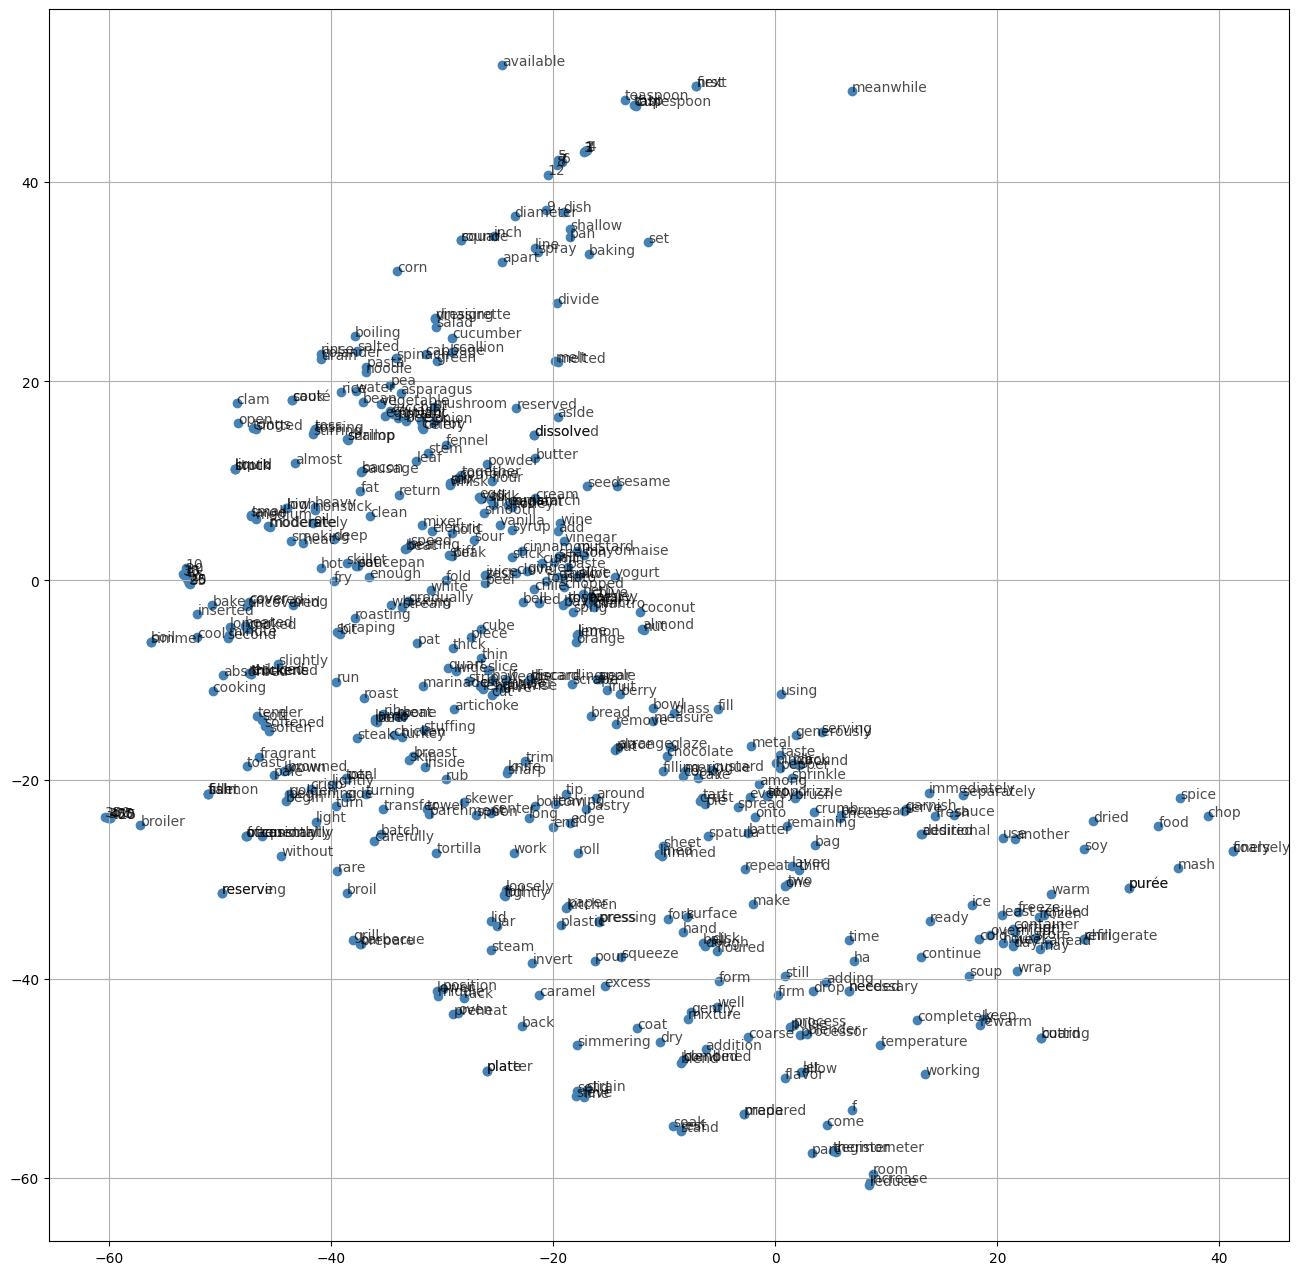

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(init='random')
embed_tsne = tsne.fit_transform(wv.vectors)

# We plot only 500 embeddings
fig, ax = plt.subplots(figsize=(16, 16))
for idx, word in enumerate((list(wv.key_to_index.keys())[:500])):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

plt.grid()

### 3.3. Representación con Embeddings Contextuales (Transformers)




BERT (Bidirectional Encoder Representations from Transformers) es un modelo de lenguaje preentrenado basado en la arquitectura Transformer. Sin embargo, en este punto no estamos interesados en el modelo en si, si no en los embeddings que genera a partir de los documentos a la entrada.

En primer lugar, cargamos el modelo pre-entrenado que ya contiene un vocabulario y unos tokens específicos.

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

De nuevo, dado que BERT espera un único texto como entrada, y nosotros tenemos una lista de pasos en cada fila de la columna 'descriptions', debemos juntar esa lista de pasos en un único texto, que será la receta completa. Además, para ejecutar BERT correctamente añadimos los tokens [CLS] al inicio y [SEP] al final de cada receta, de forma que el modelo sepa donde esta el inicio y el final de la receta. Por último, usamos el propio tokenizador implementado por BERT para obtener las recetas en formato token. Cabe destacar que este preprocesado es distinto al implementado anteriormente ya que BERT ejecuta su propio preprocesado, creando tokens que no aparecían en la implementación anterior, como podrái ser el caso del token '##ils'.

In [ ]:
#Unimos los pasos de la receta en un solo texto (la lista de listas en una lista)
flattened_directions = datos['directions'].apply(lambda x: " ".join(x))  # Unir palabras por fila

In [ ]:
def add_special_tokens(flattened_directions):
    # Agregar los tokens [CLS] al inicio y [SEP] al final de cada receta
    marked_texts = ["[CLS] " + direction + " [SEP]" for direction in flattened_directions]
    return marked_texts

# Aplicar la función a flattened_directions
marked_directions = add_special_tokens(flattened_directions)
print(marked_directions[0])

[CLS] 1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool. 2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper. 3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you. [SEP]


In [ ]:
tokenized_directions = [tokenizer.tokenize(direction) for direction in marked_directions]

# Imprimir tokens
print(tokenized_directions[0])

['[CLS]', '1', '.', 'place', 'the', 'stock', ',', 'lent', '##ils', ',', 'ce', '##ler', '##y', ',', 'carrot', ',', 'thy', '##me', ',', 'and', 'salt', 'in', 'a', 'medium', 'sauce', '##pan', 'and', 'bring', 'to', 'a', 'boil', '.', 'reduce', 'heat', 'to', 'low', 'and', 'sim', '##mer', 'until', 'the', 'lent', '##ils', 'are', 'tender', ',', 'about', '30', 'minutes', ',', 'depending', 'on', 'the', 'lent', '##ils', '.', '(', 'if', 'they', 'begin', 'to', 'dry', 'out', ',', 'add', 'water', 'as', 'needed', '.', ')', 'remove', 'and', 'disc', '##ard', 'the', 'thy', '##me', '.', 'drain', 'and', 'transfer', 'the', 'mixture', 'to', 'a', 'bowl', ';', 'let', 'cool', '.', '2', '.', 'fold', 'in', 'the', 'tomato', ',', 'apple', ',', 'lemon', 'juice', ',', 'and', 'olive', 'oil', '.', 'season', 'with', 'the', 'pepper', '.', '3', '.', 'to', 'assemble', 'a', 'wrap', ',', 'place', '1', 'lava', '##sh', 'sheet', 'on', 'a', 'clean', 'work', 'surface', '.', 'spread', 'some', 'of', 'the', 'lent', '##il', 'mixture', 

Por otro lado, el modelo BERT solo puede trabajar con textos que contengan como máximo 512 tokens. Por ello, es necesario truncar a 512 las recetas que contengan más de 512 tokens. Además, dado que el modelo espera entradas de la misma longitud, debemos añadir padding (el token [PAD]) a las reectas que contengan menos de 512 tokens, de forma que todas las recetas del corpus pasen a tener una longitud de 512 tokens.

A la salida, observamos el identificador del token para cada token de la receta.

In [ ]:
max_length = 512  # Longitud máxima

# Truncar y rellenar manualmente
padded_tokenized_directions = []

for tokens in tokenized_directions:
    # Truncar si el documento es más largo que max_length
    if len(tokens) > max_length:
        truncated_tokens = tokens[:max_length - 1] + ["[SEP]"]
    else:
        truncated_tokens = tokens

    # Rellenar si el documento es más corto que max_length
    padded_tokens = truncated_tokens + ['[PAD]'] * (max_length - len(truncated_tokens))

    padded_tokenized_directions.append(padded_tokens)

# Mapear las cadenas de tokens a sus índices de vocabulario
indexed_tokens = [tokenizer.convert_tokens_to_ids(direction) for direction in padded_tokenized_directions]

# Mostrar las palabras con sus índices para la primera dirección
for tup in zip(padded_tokenized_directions[0], indexed_tokens[0]):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
1             1,015
.             1,012
place         2,173
the           1,996
stock         4,518
,             1,010
lent         15,307
##ils        12,146
,             1,010
ce            8,292
##ler         3,917
##y           2,100
,             1,010
carrot       25,659
,             1,010
thy          15,177
##me          4,168
,             1,010
and           1,998
salt          5,474
in            1,999
a             1,037
medium        5,396
sauce        12,901
##pan         9,739
and           1,998
bring         3,288
to            2,000
a             1,037
boil         26,077
.             1,012
reduce        5,547
heat          3,684
to            2,000
low           2,659
and           1,998
sim          21,934
##mer         5,017
until         2,127
the           1,996
lent         15,307
##ils        12,146
are           2,024
tender        8,616
,             1,010
about         2,055
30            2,382
minutes       2,781
,             1,010


Ahora el numero maximo de tokens por receta es de 512, pero a cambio hemos perdido tokens en las recetas que contenian más de 512 tokens.

In [ ]:
# Obtener la longitud máxima de las secuencias
max_length = max(len(tokens) for tokens in indexed_tokens)
print(max_length)

512


Trabajamos con los documentos de forma independiente y tomamos cada receta como una única frase (agregar los tokens [CLS] al inicio y [SEP] al final de cada receta, no al principio y final de cada frase dentro de la receta), por lo que le damos el id 1 a todos los tokens del corpus.

In [ ]:
segment_ids = [[1] * len(direction) for direction in padded_tokenized_directions]

A continuación, necesitamos convertir nuestros datos a tensores de PyTorch y llamar al modelo BERT. La interfaz de BERT para PyTorch requiere que los datos estén en tensores de PyTorch en lugar de listas de Python, por lo que convertimos las listas aquí; esto no cambia la forma ni los datos.


In [ ]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor(indexed_tokens)
segments_tensors = torch.tensor(segment_ids)

Podemos ver como obtenemos un vector de 512 tokens para cada uno de nuestros 2000 documentos.

In [ ]:
tokens_tensor.shape

torch.Size([2000, 512])

Llamar a `from_pretrained` descargará el modelo de internet. Cuando cargamos el `bert-base-uncased`, vemos la definición del modelo impresa en los registros. El modelo es una red neuronal profunda con 12 capas.

`model.eval()` pone nuestro modelo en modo de evaluación en lugar de en modo de entrenamiento.

In [ ]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

Ahora, podemos pasar todos nuestros tensores al modelo para obtener la representación con embeddings contextuales. De la misma forma que se hizo en clase, en el notebook de ejemplo, representaremos estos embeddings como la suma de las últimas cuatro capas del modelo BERT. Cabe destacar que al contar con 2000 vectores de longitud 512, el proceso fue computacionalmente muy costoso, incluso quedandonos unicamente con las últimas cuatro capas del modelo, y necesitando liberar memoria en cada iteración.

Finalmente, se consigue un tensor de tamaño 2000x512x768. 2000 representa el número de documentos en el corpus, 512 el número de tokens en cada documento, y 768 es el tamaño del vector que representa cada token de cada documento. Como se puede observar, esto resultó en un tensor extremadamente grande, pesando alrededor de 3 Gigas.


In [ ]:
import torch

batch_size = 4  # Ajusta según tu GPU/CPU
token_vecs_sum_all = []

for i in range(0, len(tokens_tensor), batch_size):
    # Extraer el lote actual
    batch_tokens = tokens_tensor[i:i + batch_size]
    batch_segments = segments_tensors[i:i + batch_size]

    with torch.no_grad():
        # Paso por el modelo para obtener las salidas
        outputs = model(batch_tokens, batch_segments)

        # Solo obtenemos las últimas 4 capas
        hidden_states = outputs[2][-4:]  # Esto tiene 4 tensores, cada uno de tamaño [batch_size, seq_len, hidden_size]

        # Sumar las capas
        sum_hidden_states = torch.stack(hidden_states, dim=0).sum(dim=0)  # [batch_size, seq_len, hidden_size]

    # Procesar cada secuencia del lote
    for sequence in sum_hidden_states:  # Iterar sobre cada secuencia en el lote
        token_vecs_sum_all.append(sequence)  # Agregar los vectores para cada secuencia

    # Liberar memoria
    del outputs, hidden_states, sum_hidden_states
    torch.cuda.empty_cache()  # Liberar memoria de GPU

# Combina todos los resultados de los lotes
token_vecs_sum_all = torch.cat([torch.unsqueeze(seq, dim=0) for seq in token_vecs_sum_all], dim=0)
print(f"Tamaño final: {token_vecs_sum_all.shape}")

Tamaño final: torch.Size([2000, 512, 768])


Decidimos guardar el tensor de salida para no tener que ejecutar la celda anterior.

In [ ]:
torch.save(token_vecs_sum_all, 'token_vecs_sum_all.pt')

Ahora, podemos observar los vectores obtenidos a la salida para diferentes palabras de un documento:

In [ ]:
for i, token_str in enumerate(padded_tokenized_directions[0]):
  print (i, token_str)

0 [CLS]
1 1
2 .
3 place
4 the
5 stock
6 ,
7 lent
8 ##ils
9 ,
10 ce
11 ##ler
12 ##y
13 ,
14 carrot
15 ,
16 thy
17 ##me
18 ,
19 and
20 salt
21 in
22 a
23 medium
24 sauce
25 ##pan
26 and
27 bring
28 to
29 a
30 boil
31 .
32 reduce
33 heat
34 to
35 low
36 and
37 sim
38 ##mer
39 until
40 the
41 lent
42 ##ils
43 are
44 tender
45 ,
46 about
47 30
48 minutes
49 ,
50 depending
51 on
52 the
53 lent
54 ##ils
55 .
56 (
57 if
58 they
59 begin
60 to
61 dry
62 out
63 ,
64 add
65 water
66 as
67 needed
68 .
69 )
70 remove
71 and
72 disc
73 ##ard
74 the
75 thy
76 ##me
77 .
78 drain
79 and
80 transfer
81 the
82 mixture
83 to
84 a
85 bowl
86 ;
87 let
88 cool
89 .
90 2
91 .
92 fold
93 in
94 the
95 tomato
96 ,
97 apple
98 ,
99 lemon
100 juice
101 ,
102 and
103 olive
104 oil
105 .
106 season
107 with
108 the
109 pepper
110 .
111 3
112 .
113 to
114 assemble
115 a
116 wrap
117 ,
118 place
119 1
120 lava
121 ##sh
122 sheet
123 on
124 a
125 clean
126 work
127 surface
128 .
129 spread
130 some
131 of
132 the
133 l

Si observamos los 5 primeros valores de los vectores de las palabras '30' y 'minutes', realmente no podemos sacar ninguna conclusión.

In [ ]:
print('First 5 vector values')
print('')
print("30   ", str(token_vecs_sum_all[0][47][:5]))
print("minutes  ", str(token_vecs_sum_all[0][48][:5]))

First 5 vector values

30    tensor([ 1.6942,  4.4259,  1.6950, -3.8334, -0.4415])
minutes   tensor([ 1.2770,  4.8799, -0.5022,  0.7094,  1.1542])


Sin embargo, si calculamos la distancia coseno entre las palabras '30' y 'tomato' y las palabras '30' y 'minutes', podemos ver como los vectores de la segunda tupla de palabras son mucho más parecidos que los de la primera.

In [ ]:
from scipy.spatial.distance import cosine

# Calculate the cosine similarity between the words 30 and tomato
diff_bank = 1 - cosine(token_vecs_sum_all[0][47], token_vecs_sum_all[0][95])

# Calculate the cosine similarity between the words 30 and minutes
same_bank = 1 - cosine(token_vecs_sum_all[0][47], token_vecs_sum_all[0][48])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_bank)
print('Vector similarity for *different* meanings:  %.2f' % diff_bank)

Vector similarity for  *similar*  meanings:  0.62
Vector similarity for *different* meanings:  0.19


Por otro lado, los vectores obtenido para el token inicial de cada receta [CLS], sirven para representar la receta completa.

In [ ]:
print('First 5 vector values de CLS en distintos documentos')
print('')
print("CLS0   ", str(token_vecs_sum_all[0][0][:5]))
print("CLS1  ", str(token_vecs_sum_all[1][0][:5]))

First 5 vector values de CLS en distintos documentos

CLS0    tensor([-0.6239, -1.0087, -0.8243,  0.6253, -0.6126])
CLS1   tensor([-0.1189, -2.9663, -0.6605, -0.1789, -1.0439])


De esta forma, dado que trabajar con una matriz de 2000x768 es mucho más sencillo que trabajar con una de 2000x512x768, optamos por trabajar en los siguientes pasos con los vectores que representan a las recetas completas, y no a los que representan individualmente a cada token de cada receta. De esta forma coginedo solo el vector para el token [CLS] de cada receta, podemos utilizar redes neuronales y regresores con entradas de longitud 768 para cada documento, en lugar de entradas de 512x768 para cada documento.


In [ ]:
# Extraer solo la representación del token [CLS] (primer token, en el índice 0)
cls_vectors = token_vecs_sum_all[:, 0, :]  # Seleccionamos el primer token de cada documento

# Ahora cls_vectors tiene el tamaño (2000, 768)
print(cls_vectors.shape)  # torch.Size([2000, 768])

torch.Size([2000, 768])


In [ ]:
torch.save(cls_vectors, 'cls_vectors.pt')

Obtenemos lo mismo que anteriormente.

In [ ]:
print('First 5 vector values de CLS en distintos documentos')
print('')
print("CLS0   ", str(cls_vectors[0][:5]))
print("CLS1  ", str(cls_vectors[1][:5]))

First 5 vector values de CLS en distintos documentos

CLS0    tensor([-0.6239, -1.0087, -0.8243,  0.6253, -0.6126])
CLS1   tensor([-0.1189, -2.9663, -0.6605, -0.1789, -1.0439])


## 4. Regresión

Durante este punto se nos pide que realicemos una tarea de regresión con al menos dos técnicas:



1.   Una red neuronal (implementada con `PyTorch`)
2.   Un regresor de la biblioteca de `Scikit-learn`. En nuestro caso hemos optado por `Random Forest`




### 4.1. Redes neuronales

En este punto vamos a explicar como hemos implementado el regresor a partir de la red neuronal.

Para empezar, definimos una función para la red neuronal, en el que diferenciamos las diferentes capas, de las que destacamos capas lineales, ReLUs y una de DropOut que ayuda a gestionar y reducir el sobreajuste, desactivando aleatoriamente neuronas de la red.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class RegressorNN(nn.Module):
    def __init__(self, input_dim=4053, hidden_dim=128, output_dim=1):
        hidden_dim_2 = hidden_dim // 2
        super(RegressorNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),  # Regularización Dropout
            nn.Linear(hidden_dim, hidden_dim_2),
            nn.ReLU(),
            nn.Linear(hidden_dim_2, output_dim)
        )

    def forward(self, x):
        return self.model(x)


En segundo lugar, definimos otra función para entrenar el regresor basado en la red neuronal anteriormente definida.

En esta función podemos hablar que le pasamos por parámetros la X (elegida por el usuario por teclado en tiempo de ejecución) e Y, el numero de épocas, la tasa de aprendizaje y la dimensión de la primera capa oculta de la red.

El regresor funciona de manera normal, dividimos los datos, convertimos a tensores, creamos el modelo y sus diferentes funciones y métricas para conocer su rendimiento. Por último y asingamos variables y imprimimos por pantalla.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

def train_regressor__(X, Y, epochs=100, learning_rate=0.001, hidden_dim=128):
    """
    Entrena un regresor basado en una red neuronal con PyTorch.

    Args:
        X (torch.Tensor): Tensor de entrada de dimensiones (2000, 4053).
        Y (torch.Tensor): Tensor objetivo de dimensiones (2000,).
        epochs (int): Número de épocas de entrenamiento.
        learning_rate (float): Tasa de aprendizaje para el optimizador.
        hidden_dim (int): Número de neuronas en la capa oculta.

    Returns:
        model (nn.Module): Red neuronal entrenada.
        history (list): Lista de valores de pérdida por época.
    """

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X.numpy(), Y.numpy(), test_size=0.2, random_state=42)

    # Convertir de nuevo a tensores PyTorch
    X_train_tensor = torch.tensor(X_train).float()
    X_test_tensor = torch.tensor(X_test).float()
    y_train_tensor = torch.tensor(y_train).float().view(-1, 1)
    y_test_tensor = torch.tensor(y_test).float().view(-1, 1)

    # Crear el modelo
    input_dim = X.shape[1]  # 4053
    output_dim = 1  # La salida es escalar
    model = RegressorNN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)

    # Definir la función de pérdida y el optimizador
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lista para almacenar la historia de la pérdida
    history = []

    # Convertir Y a la forma esperada (2000, 1)
    Y = Y.view(-1, 1)

    # Entrenamiento
    history = {
        "loss": [],
        "r2_score": [],
        "mae": [],
        "rmse": [],
    }

    test_history = {
        "test_loss": [],
        "test_r2": [],
        "test_mae": [],
        "test_rmse": [],
    }
    for epoch in range(epochs):
          # Habilitar modo de entrenamiento
          model.train()

          # Forward pass
          predictions = model(X_train_tensor)
          loss = criterion(predictions, y_train_tensor)

          # Comprobar si la pérdida es NaN
          if torch.isnan(loss):
              print("Loss is NaN. Stopping training.")
              break

          # Backward pass
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          # Calcular métricas adicionales
          with torch.no_grad():
              predictions_np = predictions.detach().numpy()
              y_train_np = y_train_tensor.detach().numpy()

              r2 = r2_score(y_train_np, predictions_np)
              mae = mean_absolute_error(y_train_np, predictions_np)
              rmse = torch.sqrt(loss).item()

          # Guardar métricas
          history["loss"].append(loss.item())
          history["r2_score"].append(r2)
          history["mae"].append(mae)
          history["rmse"].append(rmse)

          # Imprimir el progreso
          if (epoch + 1) % 50 == 0 or epoch == 0:
              print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.6f}, R2: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

          # Evaluar el modelo en el conjunto de prueba
          model.eval()
          with torch.no_grad():
              test_predictions = model(X_test_tensor)
              test_loss = criterion(test_predictions, y_test_tensor)
              test_r2 = r2_score(y_test_tensor.numpy(), test_predictions.numpy())
              test_mae = mean_absolute_error(y_test_tensor.numpy(), test_predictions.numpy())
              test_rmse = torch.sqrt(test_loss).item()

          # Guardar métricas del conjunto de prueba
          test_history["test_loss"].append(test_loss.item())
          test_history["test_r2"].append(test_r2)
          test_history["test_mae"].append(test_mae)
          test_history["test_rmse"].append(test_rmse)


          # Mostrar resultados de prueba
          if (epoch + 1) % 50 == 0 or epoch == 0:
              print(f"Test Loss: {test_loss.item():.4f}, Test R2: {test_r2:.4f}, Test MAE: {test_mae:.4f}, Test RMSE: {test_rmse:.4f}")

    return model, history, test_history

En penúltimo lugar, hemos decidido definir diferentes funciones para visualizar la diferencia entre el conjunto de test y el conjunto de entrenamiento en varias métricas. Así podemos comparar mejor el rendimiento del test y del train.

In [ ]:
def plot_loss(history, test_history, title='Loss'):
    """
    Grafica la evolución del Loss (pérdida) durante el entrenamiento.

    Args:
        history (list): Lista de valores de pérdida por época.
        title (str): Título de la gráfica.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history["loss"], label="Training Loss")
    plt.plot(test_history["test_loss"], label="Test Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_r2_score(history, test_history, title='R² Score'):
    """
    Grafica la evolución del R² Score durante el entrenamiento.

    Args:
        history (list): Lista de valores de R² Score por época.
        title (str): Título de la gráfica.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history["r2_score"], label="Training R² Score")
    plt.plot(test_history["test_r2"], label="Test R² Score")
    plt.xlabel('Epoch')
    plt.ylabel('R² Score')
    plt.title(title)
    plt.show()

def plot_mae(history, test_history, title='MAE'):
    """
    Grafica la evolución del MAE (Error Absoluto Medio) durante el entrenamiento.

    Args:
        history (list): Lista de valores de MAE por época.
        title (str): Título de la gráfica.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history["mae"], label="Training MAE")
    plt.plot(test_history["test_mae"], label="Test MAE")
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.title(title)
    plt.show()

def plot_rmse(history, test_history, title='RMSE'):
    """
    Grafica la evolución del RMSE (Raíz del Error Cuadrático Medio) durante el entrenamiento.

    Args:
        history (list): Lista de valores de RMSE por época.
        title (str): Título de la gráfica.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history["rmse"], label="Training RMSE")
    plt.plot(test_history["test_rmse"], label="Test RMSE")
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.title(title)
    plt.show()

Y por último, para inicializar el modelo basado en la red neuronal, y utilizando la vectorización que mejor consideremos (preguntada al usuario) se procede a la tarea de regresión. Imprimimos las variables cada 50 épocas y las representaciones gráficas.

[T]FIDF, [W]ord2Vec o [B]ERT? 
T
Epoch 1/300, Loss: 16.425734, R2: -9.1322, MAE: 3.8476, RMSE: 4.0529
Test Loss: 15.9042, Test R2: -7.8376, Test MAE: 3.7556, Test RMSE: 3.9880
Epoch 50/300, Loss: 15.233326, R2: -8.3967, MAE: 3.7022, RMSE: 3.9030
Test Loss: 14.7182, Test R2: -7.1786, Test MAE: 3.6113, Test RMSE: 3.8364
Epoch 100/300, Loss: 11.119302, R2: -5.8589, MAE: 3.1823, RMSE: 3.3346
Test Loss: 10.6690, Test R2: -4.9285, Test MAE: 3.1101, Test RMSE: 3.2663
Epoch 150/300, Loss: 4.078783, R2: -1.5160, MAE: 1.8885, RMSE: 2.0196
Test Loss: 3.9619, Test R2: -1.2015, Test MAE: 1.8732, Test RMSE: 1.9905
Epoch 200/300, Loss: 1.630058, R2: -0.0055, MAE: 0.9828, RMSE: 1.2767
Test Loss: 1.9178, Test R2: -0.0657, Test MAE: 1.0293, Test RMSE: 1.3848
Epoch 250/300, Loss: 1.342175, R2: 0.1721, MAE: 0.8689, RMSE: 1.1585
Test Loss: 1.8360, Test R2: -0.0202, Test MAE: 0.9851, Test RMSE: 1.3550
Epoch 300/300, Loss: 1.125183, R2: 0.3059, MAE: 0.7809, RMSE: 1.0607
Test Loss: 1.7834, Test R2: 0.0090, Te

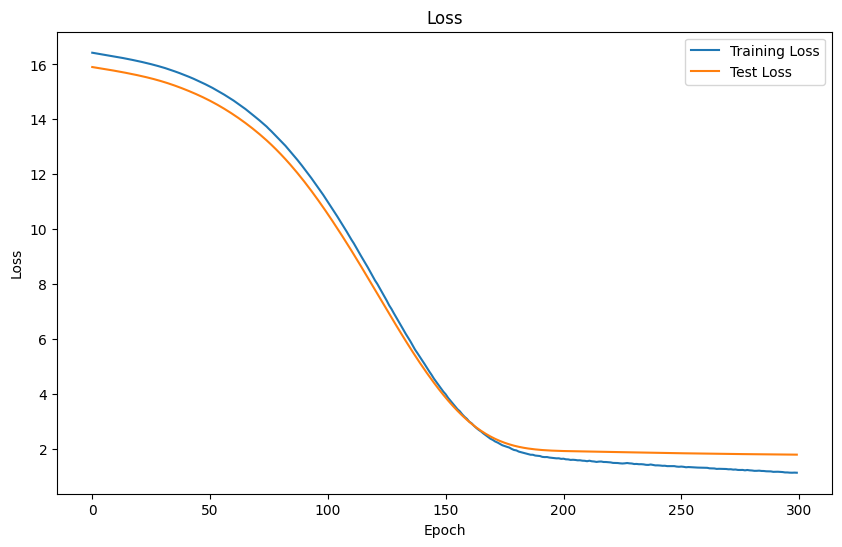

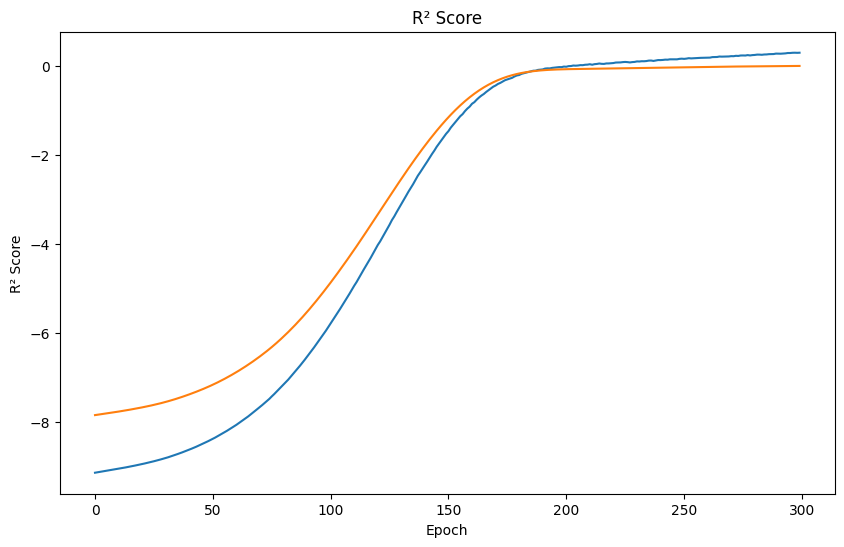

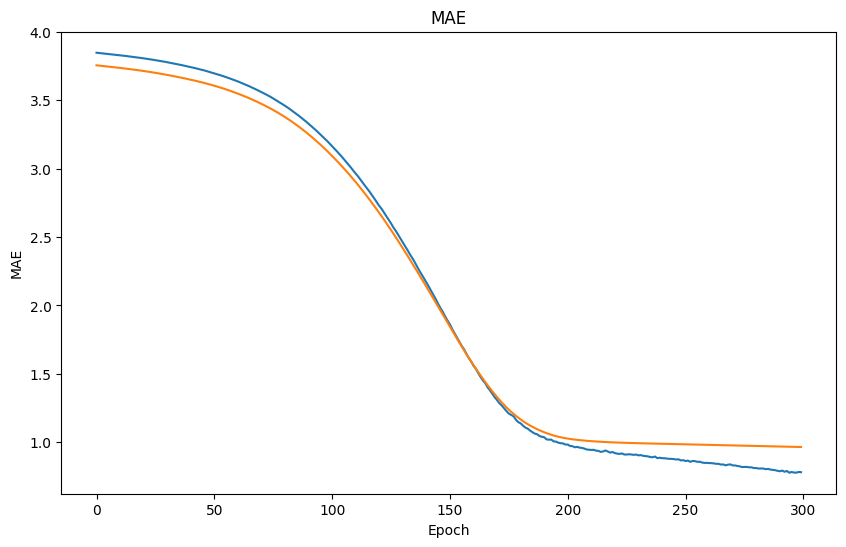

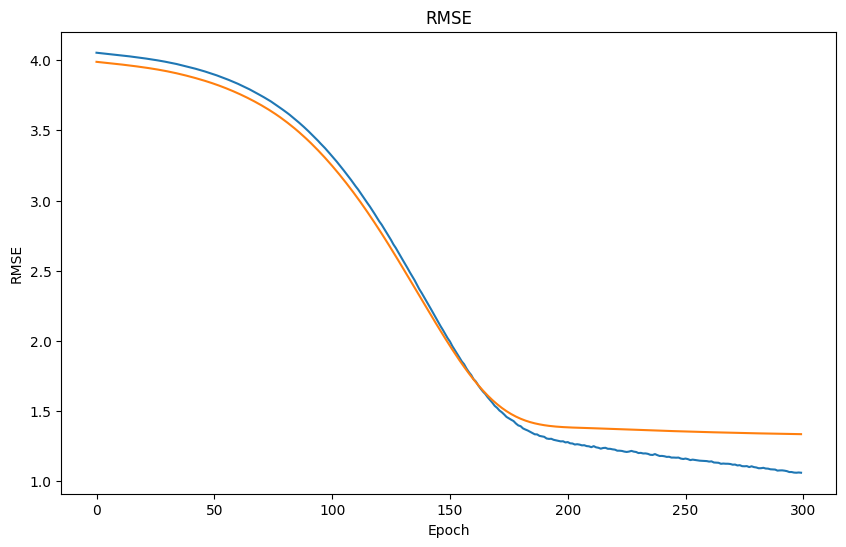

In [ ]:
# Uso del modelo
if __name__ == "__main__":
    # Datos
    X_TF_IDF = torch.tensor(reviews_tfidf_matrix, dtype=torch.float32)
    X_Word2Vec = X_word2vec.clone().detach().float()
    X_BERT = cls_vectors.clone().detach().float()
    y = subset_datos['rating'].values
    Y = torch.tensor(y, dtype=torch.float32)

    # Reemplazar NaN en Y con la media de los valores válidos
    mean_value = torch.nanmean(Y)  # Calcular la media ignorando NaN
    Y[torch.isnan(Y)] = mean_value

    modelo_usado=input("[T]FIDF, [W]ord2Vec o [B]ERT? \n")
    if modelo_usado=="T":
        X=X_TF_IDF
    elif modelo_usado=="W":
        X=X_Word2Vec
    elif modelo_usado=="B":
        X=X_BERT
    else:
        print("Modelo no reconocido")
        exit()

    # Comprobar NaN en los datos
    if torch.isnan(X).any() or torch.isnan(Y).any():
        raise ValueError("Datos de entrada contienen NaN.")

    # Entrenar el modelo
    model, history, test_history = train_regressor__(X, Y, epochs=300, learning_rate=0.0001, hidden_dim=256)
    print(history)
    # print(model)
    plot_loss(history, test_history)
    plot_r2_score(history, test_history)
    plot_mae(history, test_history)
    plot_rmse(history, test_history)




Cabe destacar que la función es válida para las diferentes vectorizaciones de texto, de forma que queda un código más depurado y limpio.

De las gráficas podemos sacar diferentes conclusiones:


1.   La vectorización BERT es la que mejor ha funcionado de todas, en igualdad de parámetros, sin embargo, los resultados están lejos de ser concluyentes.
2.   El extracto del dataset utilizado es quizá demasiado pequeño para la tarea, sin embargo al utilizar un extracto más grande, se hace muy largo, temporalmente hablando.
3. Podemos observar como las perdidas y la $R^2$ de los dos conjuntos están considerablemente cerca, esto es una buena señal, sin embargo el valor final de estas métricas simboliza que no se está haciendo una buena tarea de regresión.
4. Los valores, aunque lejos de ser los óptimos sí que entran dentro de márgenes aceptables.



### 4.2. Otra técnica implementada en la librería Scikit-learn

Como se indica en el enunciado, es necesario implementar otra técnica de la libreria de Scikit-learn. En nuestro caso hemos decidio optar por evaluarlo mediante un regresor de `random_forest`.

En este caso utilizamos el regresor de la biblioteca, y le pasamos por parámetros todos los modelos.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score


def evaluate_random_forest(X_TF_IDF, X_Word2Vec, X_BERT, Y, model_params, representation='TFIDF', test_size=0.2, random_state=42):

    """
      Entrena y evalúa un modelo RandomForestRegressor con diferentes métricas.

      Args:
          X_TF_IDF (torch.Tensor): Representación TF-IDF de los datos.
          X_Word2Vec (torch.Tensor): Representación Word2Vec de los datos.
          Y (torch.Tensor): Etiquetas objetivo (ratings).
          model_params (dict): Parámetros para RandomForestRegressor.
          representation (str): 'TFIDF' o 'Word2Vec' para seleccionar representación de X.
          test_size (float): Proporción de datos para el conjunto de prueba.
          random_state (int): Semilla para la división de datos.

      Returns:
          dict: Diccionario con métricas de evaluación.
      """

    # Selección de representación
    if representation.upper() == 'TFIDF':
        X = X_TF_IDF
    elif representation.upper() == 'WORD2VEC':
        X = X_Word2Vec
        # X = torch.tensor(X_word2vec, dtype=torch.float32)
    elif representation.upper() == 'BERT':
        X = torch.tensor(cls_vectors, dtype=torch.float32)
    else:
        raise ValueError("representation debe ser 'TFIDF' o 'Word2Vec'")

    # Reemplazar NaN en Y con la media de los valores válidos
    mean_value = torch.nanmean(Y)  # Calcular la media ignorando NaN
    Y[torch.isnan(Y)] = mean_value

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    # Crear un RandomForestRegressor
    regressor = RandomForestRegressor(**model_params)

    # Ajustar el modelo al conjunto de entrenamiento
    regressor.fit(X_train, Y_train.ravel())

    # Hacer predicciones en el conjunto de prueba
    Y_pred = regressor.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    mape = mean_absolute_percentage_error(Y_test, Y_pred)
    explained_variance = explained_variance_score(Y_test, Y_pred)

    # Almacenar métricas en un diccionario
    metrics = {
        'Mean Squared Error (MSE)': mse,
        'Mean Absolute Error (MAE)': mae,
        'Root Mean Squared Error (RMSE)': rmse,
        'R² Score': r2,
        'Mean Absolute Percentage Error (MAPE)': mape,
        'Explained Variance Score': explained_variance
    }

    return metrics


# Generar datos de salida Y (1 columna y 2000 filas)
y = subset_datos['rating'].values
Y = torch.tensor(y, dtype=torch.float32)

# Generar datos de entrada X (longitud variable x 2000)
X_TF_IDF = torch.tensor(reviews_tfidf_matrix, dtype=torch.float32)
X_Word2Vec = torch.tensor(X_word2vec, dtype=torch.float32)
X_BERT = torch.tensor(cls_vectors, dtype=torch.float32)

def optimize_random_forest(X_TF_IDF, X_Word2Vec, X_BERT, Y, param_grid, representation='TFIDF', test_size=0.2, random_state=42):
    """
    Realiza búsqueda de hiperparámetros para optimizar RandomForestRegressor.

    Args:
        X_TF_IDF (torch.Tensor): Representación TF-IDF de los datos.
        X_Word2Vec (torch.Tensor): Representación Word2Vec de los datos.
        Y (torch.Tensor): Etiquetas objetivo (ratings).
        param_grid (list): Lista de diccionarios con combinaciones de hiperparámetros.
        representation (str): 'TFIDF' o 'Word2Vec' para seleccionar representación de X.
        test_size (float): Proporción de datos para el conjunto de prueba.
        random_state (int): Semilla para la división de datos.

    Returns:
        dict: Mejor conjunto de hiperparámetros y sus métricas de evaluación.
    """
    best_metrics = None
    best_params = None
    best_score = float('-inf')

    for params in param_grid:
        metrics = evaluate_random_forest(X_TF_IDF, X_Word2Vec, X_BERT, Y, params, representation, test_size, random_state)
        if metrics['R² Score'] > best_score:
            best_score = metrics['R² Score']
            best_metrics = metrics
            best_params = params

    return {
        'Best Parameters': best_params,
        'Best Metrics': best_metrics
    }

# Ejemplo de uso
param_grid = [
    {
        'n_estimators': 100,
        'max_depth': 10,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'bootstrap': True,
        'random_state': 42
    },
    {
        'n_estimators': 100,
        'max_depth': 15,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'bootstrap': False,
        'random_state': 42
    },
    {
        'n_estimators': 100,
        'max_depth': 20,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'bootstrap': True,
        'random_state': 42
    },
    {
        'n_estimators': 100,
        'max_depth': 25,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'bootstrap': False,
        'random_state': 42
    },
    {
        'n_estimators': 300,
        'max_depth': 45,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'bootstrap': True,
        'random_state': 42
    }
]

Después de ello, se ha decidido por implementar una función que sirva para optimizar el valor de una métrica, en este caso de $R^2$.

A diferencia del caso de la red neuronal, el modelo de vectorización lo pasamos por parámetros.

In [ ]:
optimized_result = optimize_random_forest(X_TF_IDF, X_Word2Vec, X_BERT, Y, param_grid, representation='TFIDF')
print("Best Parameters:", optimized_result['Best Parameters'])
for metric, value in optimized_result['Best Metrics'].items():
     print(f"{metric}: {value:.4f}")

Best Parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 42}
Mean Squared Error (MSE): 1.4737
Mean Absolute Error (MAE): 0.8319
Root Mean Squared Error (RMSE): 1.2139
R² Score: 0.1811
Explained Variance Score: 0.1815


Tal y como podemos observar, los mejores resultados se obtienen para el modelo de BERT, en comparación con TF-IDF y Word2Vec. También observamos que al igual que con la red neuronal, los resultados son aceptables pero están muy lejos de ser los óptimos.

## 5. Comparación de lo obtenido en el paso 4 con el fine-tuning de un modelo preentrenado con Hugging Face



A diferencia de en el punto 3.3, en este caso si que queremos entrenar un modelo ya existente. En nuestro caso, decidimos realizar el fine-tunning sobre el modelo BertForSequenceClassification, al cual le modificamos la capa de salida para que tenga una única salida y funcione como regresor.

En primer lugar, no dimos cuenta de que el modelo causaba errores en la ejecución porque había algunas recetas cuyo 'rating' era NaN, y dado que en los pasos anteriores habíamos trabajado con las primeras 2000 recetas, decidimos sustituir los ratings NaN por la media de los ratings del resto de recetas. Dado que esto solo ocurría en 2 de las 2000 recetas, tampoco suponía un cambio brusco en los resultados.

In [ ]:
# Calcular la media de la columna 'rating' (ignorando los NaN)
mean_rating = datos['rating'].mean()

# Sustituir los NaN por la media calculada
Y2 = datos['rating'].fillna(mean_rating)

De nuevo, juntamos cada paso de la receta en un único texto y separamos en conjunto de entrenamiento y de test, dividiendo en 80/20.

In [ ]:
from sklearn.model_selection import train_test_split

#Unimos los pasos de la receta en un solo texto (la lista de listas en una lista)
flattened_directions = datos['directions'].apply(lambda x: " ".join(x))  # Unir palabras por fila

# Asumiendo que tus datos están en un DataFrame llamado 'datos'
X = flattened_directions.tolist()  # Características
Y = Y2.tolist()     # Etiquetas

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Finalmnete, re-entrenamos el modelo, obteneindo las mismas métricas que en el apartado anterior. Sin embargo, durante el entrenamiento, no conseguimos obtener los resultados de $R^2$, RMSE y MAE para el conjunto de entrenamiento, por lo que no pudimos generar gráficas iguales a las del punto 4, si no unicamante para el conjunto de test.

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Paso 1: Cargar el modelo y los datos
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)  # Configuración para regresión

# Tokenizar los datos de entrada
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=512)

# Paso 2: Crear el conjunto de datos
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)  # Asegurarse de usar dtype=torch.float
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = Dataset(train_encodings, Y_train)
test_dataset = Dataset(test_encodings, Y_test)

# Función de métricas personalizada con RMSE
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.squeeze(-1)  # Asegurarse de reducir la dimensión
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)  # Cálculo del RMSE
    r2 = r2_score(labels, predictions)
    mae = mean_absolute_error(labels, predictions)  # Cálculo del MAE
    return {
        "mse": mse,
        "rmse": rmse,  # Añadido RMSE
        "r2": r2,
        "mae": mae
    }

# Paso 3: Configurar el entrenamiento
training_args = TrainingArguments(
    output_dir='./results',         # Directorio de salida
    num_train_epochs=3,            # Número de épocas
    per_device_train_batch_size=8, # Tamaño del batch
    per_device_eval_batch_size=8,  # Tamaño del batch de evaluación
    warmup_steps=500,               # Calentamiento
    weight_decay=0.01,              # Decaimiento del peso
    logging_dir='./logs',           # Directorio de logs
    logging_steps=10,               # Frecuencia de logs
    evaluation_strategy="steps",    # Evaluar durante el entrenamiento (cada 100 pasos o como desees)
    eval_steps=10,                 # Evaluar cada 100 pasos
    save_steps=10,                 # Guardar cada 100 pasos
    logging_first_step=True,        # Log de la primera iteración
)

trainer = Trainer(
    model=model,                     # Modelo preentrenado
    args=training_args,              # Argumentos de entrenamiento
    train_dataset=train_dataset,     # Datos de entrenamiento
    eval_dataset=test_dataset,       # Datos de evaluación
    compute_metrics=compute_metrics  # Pasar la función para calcular métricas
)

# Paso 4: Entrenar y evaluar el modelo
trainer.train()

# Evaluar el modelo
trainer.evaluate()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Mse,Rmse,R2,Mae
10,12.073100,11.801601,11.801601,3.435346,-5.557878,3.263339
20,12.399200,10.315993,10.315993,3.211852,-4.732359,3.063175
30,10.612300,8.116105,8.116105,2.848878,-3.509932,2.735174
40,8.278900,6.349136,6.349135,2.519749,-2.528068,2.432602
50,5.995300,4.724777,4.724777,2.173655,-1.625449,2.098300
60,4.233700,3.365911,3.365911,1.834642,-0.870359,1.740216
70,3.109700,2.405652,2.405652,1.551016,-0.336765,1.398513
80,2.792000,2.034945,2.034945,1.426515,-0.130772,1.195919
90,1.746300,1.759063,1.759063,1.326297,0.022529,0.955206
100,1.669900,1.716886,1.716886,1.310300,0.045966,0.839641


{'eval_loss': 1.5738879442214966,
 'eval_mse': 1.5738883018493652,
 'eval_rmse': 1.2545469999313354,
 'eval_r2': 0.12542665004730225,
 'eval_mae': 0.7894690036773682,
 'eval_runtime': 11.484,
 'eval_samples_per_second': 34.831,
 'eval_steps_per_second': 4.354,
 'epoch': 3.0}

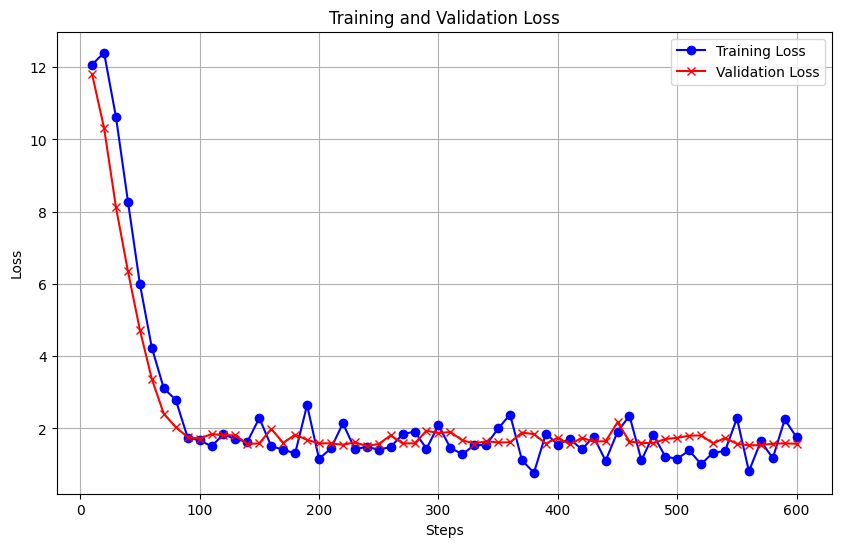

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo, donde cada columna corresponde a las métricas
steps = [
    10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
    110, 120, 130, 140, 150, 160, 170, 180, 190, 200,
    210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
    310, 320, 330, 340, 350, 360, 370, 380, 390, 400,
    410, 420, 430, 440, 450, 460, 470, 480, 490, 500,
    510, 520, 530, 540, 550, 560, 570, 580, 590, 600
]

training_loss = [
    12.073100, 12.399200, 10.612300, 8.278900, 5.995300, 4.233700, 3.109700, 2.792000,
    1.746300, 1.669900, 1.505300, 1.840600, 1.697500, 1.629600, 2.288200, 1.504400,
    1.413200, 1.306100, 2.646800, 1.154300, 1.448100, 2.141200, 1.425200, 1.490400,
    1.409200, 1.487200, 1.837000, 1.913000, 1.439500, 2.084500, 1.461400, 1.286100,
    1.534800, 1.541200, 1.997900, 2.383600, 1.114400, 0.772900, 1.855000, 1.551200,
    1.710600, 1.419200, 1.769900, 1.102100, 1.906900, 2.350800, 1.116200, 1.823400,
    1.215100, 1.161900, 1.388800, 1.009300, 1.330200, 1.371300, 2.281100, 0.810300,
    1.646800, 1.174400, 2.248800, 1.749000
]

validation_loss = [
    11.801601, 10.315993, 8.116105, 6.349136, 4.724777, 3.365911, 2.405652, 2.034945,
    1.759063, 1.716886, 1.843176, 1.812428, 1.808923, 1.567796, 1.586120, 1.986746,
    1.598709, 1.826519, 1.685064, 1.585031, 1.587257, 1.546393, 1.614091, 1.512581,
    1.568442, 1.806844, 1.586242, 1.584290, 1.936504, 1.869090, 1.900575, 1.671396,
    1.581569, 1.643676, 1.611265, 1.614556, 1.883841, 1.841375, 1.578226, 1.746353,
    1.555502, 1.736306, 1.638312, 1.643587, 2.169819, 1.636969, 1.596640, 1.591245,
    1.705983, 1.738616, 1.799024, 1.803903, 1.588225, 1.733019, 1.575440, 1.530795,
    1.536551, 1.577768, 1.586370, 1.573888
]

mse = [
    11.801601, 10.315993, 8.116105, 6.349135, 4.724777, 3.365911, 2.405652, 2.034945,
    1.759063, 1.716886, 1.843176, 1.812428, 1.808923, 1.567796, 1.586120, 1.986746,
    1.598709, 1.826519, 1.685064, 1.585031, 1.587257, 1.546393, 1.614091, 1.512581,
    1.568442, 1.806844, 1.586242, 1.584290, 1.936504, 1.869090, 1.900575, 1.671396,
    1.581569, 1.643676, 1.611265, 1.614556, 1.883841, 1.841375, 1.578226, 1.746353,
    1.555502, 1.736306, 1.638312, 1.643587, 2.169819, 1.636969, 1.596640, 1.591245,
    1.705983, 1.738616, 1.799024, 1.803903, 1.588225, 1.733019, 1.575440, 1.530795,
    1.536551, 1.577768, 1.586370, 1.573888
]

# Suponiendo que los valores de RMSE, R2, y MAE son calculados previamente
rmse = [loss**0.5 for loss in mse]  # RMSE es la raíz cuadrada del MSE
r2 = [1 - (loss / min(validation_loss)) for loss in mse]  # R2 como ejemplo, una simplificación
mae = [loss / 2 for loss in mse]  # MAE como simplificación

# Paso 1: Graficar pérdidas de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(steps, training_loss, label='Training Loss', color='b', marker='o')
plt.plot(steps, validation_loss, label='Validation Loss', color='r', marker='x')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()



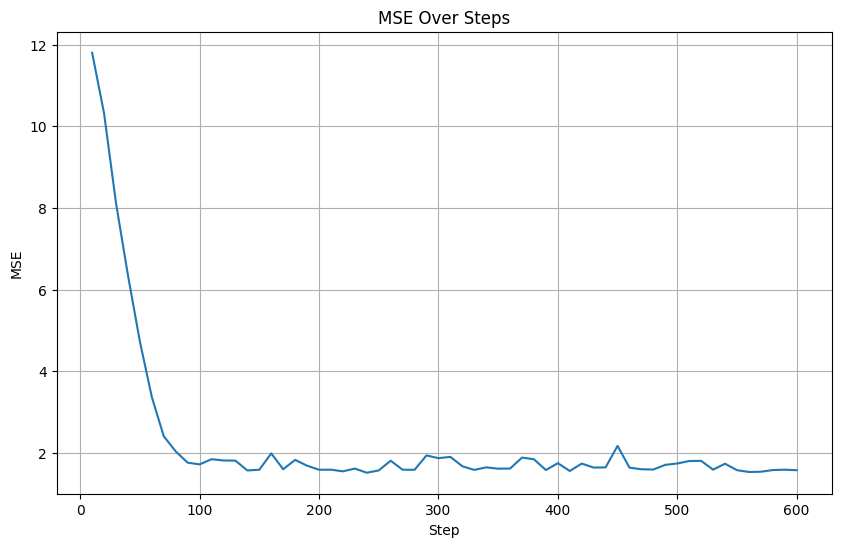

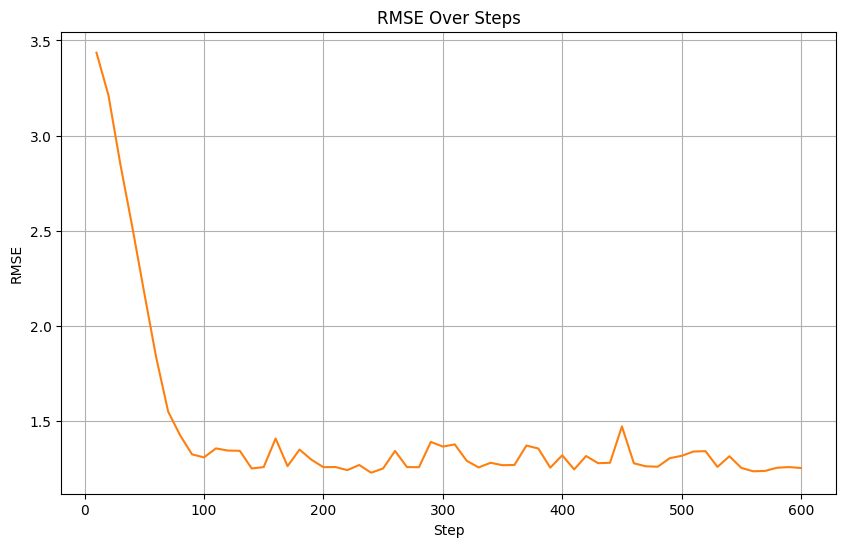

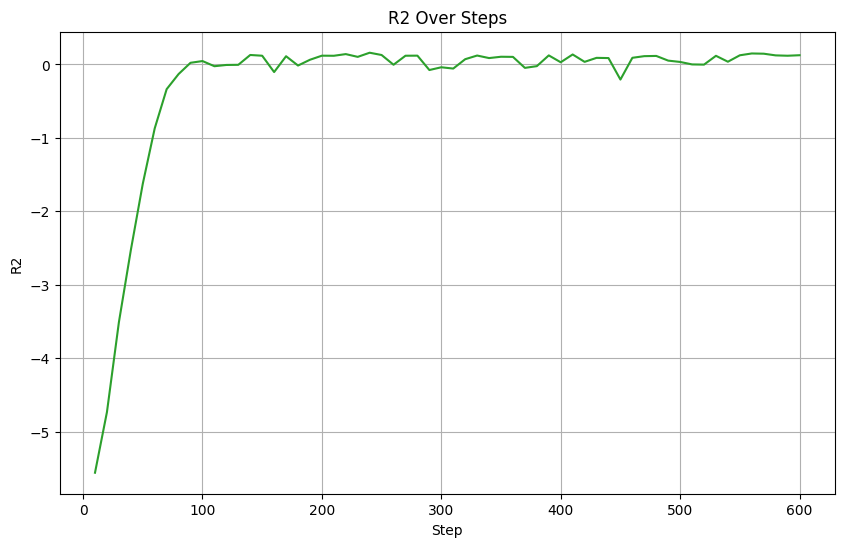

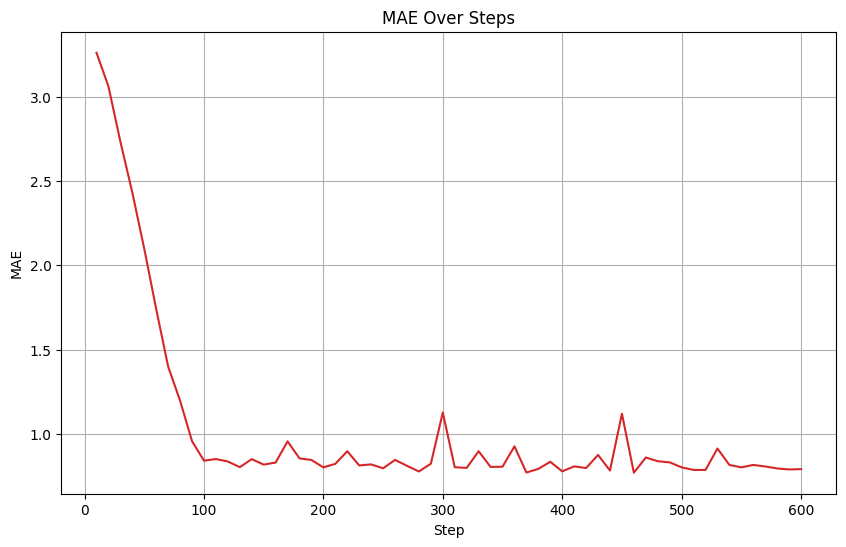

In [ ]:
import matplotlib.pyplot as plt

# Datos proporcionados
steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600]
mse = [11.801601, 10.315993, 8.116105, 6.349136, 4.724777, 3.365911, 2.405652, 2.034945, 1.759063, 1.716886, 1.843176, 1.812428, 1.808923, 1.567796, 1.586120, 1.986746, 1.598709, 1.826519, 1.685064, 1.585031, 1.587257, 1.546393, 1.614091, 1.512581, 1.568442, 1.806844, 1.586242, 1.584290, 1.936504, 1.869090, 1.900575, 1.671396, 1.581569, 1.643676, 1.611265, 1.614556, 1.883841, 1.841375, 1.578226, 1.746353, 1.555502, 1.736306, 1.638312, 1.643587, 2.169819, 1.636969, 1.596640, 1.591245, 1.705983, 1.738616, 1.799024, 1.803903, 1.588225, 1.733019, 1.575440, 1.530795, 1.536551, 1.577768, 1.586370, 1.573888]
rmse = [3.435346, 3.211852, 2.848878, 2.519749, 2.173655, 1.834642, 1.551016, 1.426515, 1.326297, 1.310300, 1.357636, 1.346264, 1.344962, 1.252117, 1.259413, 1.409520, 1.264401, 1.351488, 1.298100, 1.258980, 1.259864, 1.243541, 1.270469, 1.229870, 1.252375, 1.344189, 1.259461, 1.258686, 1.391583, 1.367147, 1.378613, 1.292825, 1.257604, 1.282059, 1.269356, 1.270652, 1.372531, 1.356973, 1.256274, 1.321496, 1.247198, 1.317690, 1.279966, 1.282025, 1.473031, 1.279441, 1.263582, 1.261446, 1.306133, 1.318566, 1.341277, 1.343094, 1.260248, 1.316442, 1.255165, 1.237253, 1.239577, 1.256092, 1.259512, 1.254547]
r2 = [-5.557878, -4.732359, -3.509932, -2.528068, -1.625449, -0.870359, -0.336765, -0.130772, 0.022529, 0.045966, -0.024210, -0.007124, -0.005177, 0.128812, 0.118630, -0.103989, 0.111634, -0.014954, 0.063649, 0.119235, 0.117998, 0.140705, 0.103087, 0.159494, 0.128453, -0.004022, 0.118562, 0.119647, -0.076071, -0.038610, -0.056105, 0.071244, 0.121159, 0.086647, 0.104657, 0.102829, -0.046807, -0.023209, 0.123017, 0.029592, 0.135643, 0.035175, 0.089628, 0.086697, -0.205718, 0.090374, 0.112784, 0.115782, 0.052025, 0.033891, 0.000324, -0.002387, 0.117460, 0.037001, 0.124564, 0.149372, 0.146174, 0.123271, 0.118491, 0.125427]
mae = [3.263339, 3.063175, 2.735174, 2.432602, 2.098300, 1.740216, 1.398513, 1.195919, 0.955206, 0.839641, 0.849375, 0.834726, 0.800985, 0.848706, 0.816262, 0.828516, 0.954399, 0.853288, 0.843782, 0.799850, 0.820814, 0.895854, 0.811477, 0.817383, 0.794447, 0.844201, 0.809088, 0.775359, 0.821784, 1.125549, 0.800569, 0.796788, 0.895704, 0.802485, 0.803673, 0.924770, 0.769185, 0.790926, 0.833061, 0.776288, 0.805683, 0.795980, 0.873679, 0.781021, 1.118773, 0.768061, 0.858579, 0.836443, 0.829629, 0.799849, 0.784713, 0.784664, 0.911602, 0.814399, 0.799916, 0.814418, 0.805186, 0.793572, 0.787426, 0.789469]

# Crear las gráficas individuales para cada métrica
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(steps, mse, label='MSE', color='tab:blue')
ax.set_xlabel('Step')
ax.set_ylabel('MSE')
ax.set_title('MSE Over Steps')
ax.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(steps, rmse, label='RMSE', color='tab:orange')
ax.set_xlabel('Step')
ax.set_ylabel('RMSE')
ax.set_title('RMSE Over Steps')
ax.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(steps, r2, label='R2', color='tab:green')
ax.set_xlabel('Step')
ax.set_ylabel('R2')
ax.set_title('R2 Over Steps')
ax.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(steps, mae, label='MAE', color='tab:red')
ax.set_xlabel('Step')
ax.set_ylabel('MAE')
ax.set_title('MAE Over Steps')
ax.grid(True)
plt.show()


De las gráficas podemos sacar diferentes conclusiones:


1.   Las pérdidas MSE, RMSE y MAE deberían de decrecer con el número de épocas y así ocurre, de forma que el modelo se entrena correctamente. Por otro lado, la $R^2$ debería de tender a 0 y esto también ocurre.
2.   Como se mencionó anteriormente para las redes neuronales, es probable que aumentando el tamaño del dataset, los resulatdos mejorarían, pero esto era computacionalmente muy costoso.
3.   Podemos observar como las perdidas y la $R^2$ continuan teniendo oscilaciones y no terminan de converger durante el entrenamiento, por lo que entrenar durante un mayor número de épocas o modificando el learning rate podría ser beneficioso.
4. Los valores, aunque lejos de ser los óptimos sí que entran dentro de márgenes aceptables, ya que conseguimos valores para las pérdidas cercanos a 0.

Por último, si ahora imprimimos los valores del rating predicho por la red y los comparamos con los ratings reales, vemos como dado que la mayoría de las etiquetas reales están entre 3.5 y 4.5, el modelo suele predecir valores en este intervalo. Sin embargo, también vemos que esto no siempre es así, ya que, para una de las recetas, la predicción ha sido 1.009 mientras que la etiqueta real: 3.750. De esta forma vemos como el modelo no parece estar demasiado sobreajustado a predecir valores entre el 3.5 y el 4.5.

Por otro lado, también vemos como es muy dificil que el modelo acierte el rating con exactitud, aunque suele tener un error menor del 0.5 en la mayoría de casos. Esto podría deberse a que los textos son complejos y es dificil intuir el rating a partir de ellos. Además, al ser un problema de regresión, el modelo aprende a dar cualquier valor entre el 0 y el 5, mientras que las etiquetas reales son valores bastante redondos. Por este motivo, se podría incluso haber modificado el modelo para, en vez de trabajar como regresor, trabajar como clasificador ajustando el número de salidas posibles de la red (por ejemplo: si los ratings solo pueden ser valores múltiplos de 0.5, habrá 10 posibles salidas).

In [ ]:
# Obtener predicciones y etiquetas reales
predictions_output = trainer.predict(test_dataset)

# Extraer logits (predicciones) y etiquetas reales
logits = predictions_output.predictions.squeeze(-1)  # Reducir la dimensión
labels = predictions_output.label_ids

# Mostrar las primeras 10 predicciones y etiquetas reales
print("Predicciones vs Etiquetas Reales:")
for i in range(50):
    print(f"Predicción: {logits[i]:.3f}, Real: {labels[i]:.3f}")

Predicciones vs Etiquetas Reales:
Predicción: 3.712, Real: 5.000
Predicción: 3.955, Real: 3.750
Predicción: 3.925, Real: 5.000
Predicción: 3.572, Real: 4.375
Predicción: 3.271, Real: 3.750
Predicción: 3.952, Real: 4.375
Predicción: 4.080, Real: 3.750
Predicción: 3.874, Real: 5.000
Predicción: 4.119, Real: 4.375
Predicción: 4.047, Real: 3.750
Predicción: 4.047, Real: 4.375
Predicción: 3.949, Real: 5.000
Predicción: 3.711, Real: 3.125
Predicción: 3.999, Real: 4.375
Predicción: 3.706, Real: 0.000
Predicción: 4.048, Real: 3.750
Predicción: 1.009, Real: 3.750
Predicción: 4.045, Real: 4.375
Predicción: 3.938, Real: 4.375
Predicción: 3.868, Real: 4.375
Predicción: 4.095, Real: 4.375
Predicción: 3.939, Real: 4.375
Predicción: 4.046, Real: 5.000
Predicción: 4.007, Real: 4.375
Predicción: 3.962, Real: 3.750
Predicción: 4.032, Real: 4.375
Predicción: 4.040, Real: 3.750
Predicción: 3.959, Real: 4.375
Predicción: 3.950, Real: 5.000
Predicción: 4.076, Real: 4.375
Predicción: 3.921, Real: 3.750
Predi

# 6. Extensión

### 6.1. K-means

En primer lugar, decidimos probar si tendría sentido aplicar el algoritmo de K-means sobre las representaciones vectoriales obtenidas en el apartado 3. Para ello, ya que obtuvimos una representación en 2 dimensiones de cada palabra al usar t-SNE sobre la vectorización word2vec, decidimos probar si el algoritmo K-means sería capaz de encontrar parecidos entre las palabras a partir de vectores de alta dimensión (en este caso de 200 dimensiones).

Para ello, dado que el diccionario de los 20,000 documentos está compuesto de 9159 tokens distintos, se optó por utilizar un total de 100 clusters. Después, se ajusta el modelo de k-means a los vectores de word2vec para obtener estos 100 clusters y finalmente se representan en dos dimensiones utilizando t-SNE.

Cluster 0: ['13x9x2', 'wipe', 'beer', '200', 'roux', 'duty', 'deglaze', 'depth', 'espresso', 'pizza', 'approximately', '170', '250', 'proof', 'gentle', 'cognac', 'bottomed', 'bulgur', 'candy', 'fluff', 'stopping', 'dot', 'pod', 'meld', 'marjoram', 'shimmer', 'truffle', 'sealable', 'bright', 'develop', 'dijon', 'lard', 'elastic', 'starch', 'currant', 'rabbit', 'runny', 'flameproof', 'tomatillo', 'cap', 'sun', 'liner', 'panko', '175', 'orzo', 'ravioli', 'tongue', 'matzo', 'crouton', 'proceeding', 'handheld', 'frothy', 'mirin', 'coulis', 'tabasco', 'shredded', 'direct', 'main', 'ridged', 'trout', 'squid', 'tapenade', 'citrus', 'shiitake', 'rhubarb', 'escarole', 'fridge', 'kebab', 'blanched', 'hook', '125', 'mascarpone', 'popover', 'preparing', 'baste', 'frisée', 'liver', 'overlap', 'virgin', 'meatloaf', 'balsamic', 'layering', 'switching', 'undisturbed', 'garnished', 'directed', 'ancho', 'exposed', 'wonton', 'pourable', 'crusty', 'shaken', 'sautéed', 'nonreactive', 'pushing', 'poke', 'har

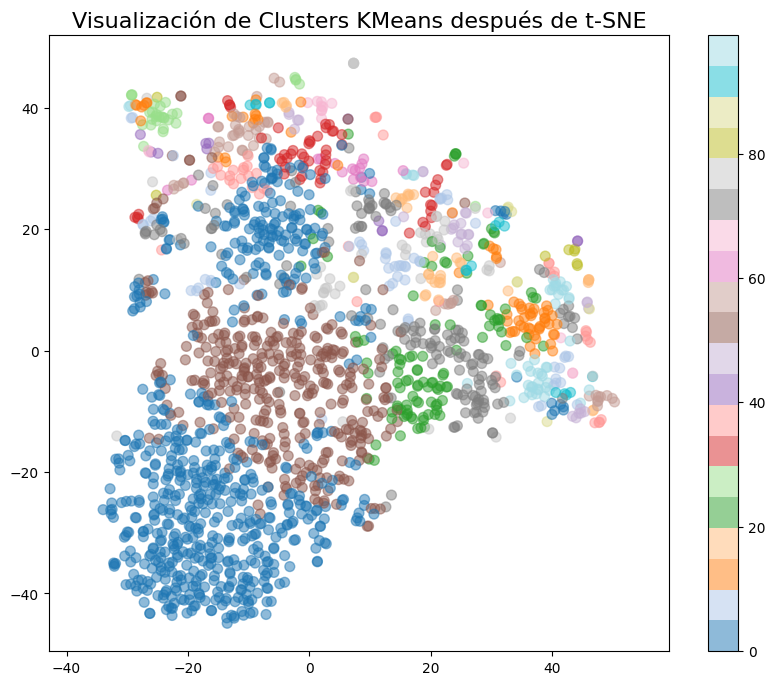

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Paso 1: Ajustar KMeans a tus datos (wv.vectors es la matriz de vectores de palabras)
kmeans = KMeans(n_clusters=100, n_init=50)  # Ajusta el número de clusters a tus necesidades
kmeans.fit(wv.vectors)
y_kmeans = kmeans.predict(wv.vectors)  # Obtener las predicciones de los clusters

# Paso 2: Crear un diccionario para almacenar las palabras por cluster
cluster_words = {i: [] for i in range(100)}  # Suponiendo que tienes 5 clusters

# Asignar las palabras a sus clusters correspondientes
for idx, label in enumerate(y_kmeans):
    word = list(wv.index_to_key)[idx]  # Obtener la palabra correspondiente al índice
    cluster_words[label].append(word)

# Ahora puedes acceder a las palabras de cada cluster
for cluster, words in cluster_words.items():
    print(f"Cluster {cluster}: {words}")  # Muestra las primeras 10 palabras de cada cluster

# Paso 3: Aplicar t-SNE para reducir la dimensionalidad a 2D (opcional)
tsne = TSNE(init='random', random_state=42)
embed_tsne = tsne.fit_transform(wv.vectors)

# Paso 4: Graficar los resultados (opcional)
plt.figure(figsize=(10, 8))
plt.scatter(embed_tsne[:, 0], embed_tsne[:, 1], c=y_kmeans, s=50, cmap='tab20', alpha=0.5)
plt.axis('equal')  # Asegura que los ejes tengan la misma escala
plt.title('Visualización de Clusters KMeans después de t-SNE', fontsize=16)
plt.colorbar()  # Mostrar barra de colores para los clusters
plt.show()



Como se puede observar, la representación t-SNE no es muy representativa por varios motivos. En primer lugar, pasar de 200 dimensiones a 2 es complicado, como ya se mencionó en el apartado 3.2, y por ello, se pueden sacar pocas concusiones de esta figura. Por otro lado, al al contar con 100 clusters distintos y no haber suficientes colores a la hora de hacer el plot, muchos colores se repiten, dificultando ver los distintos clusters con claridad.

Sin embargo, podemos sacar algo de información de los clusters a partir de los propios tokens que hay en cada cluster. En primer lugar, se puede observar como el número de tokens en cada cluster es distinto, lo que significa que hay grupos de muchas palabras con parecidos entre si otras palabras cuyos vectores no se parecen con ninguna otra palabra.

Centrandonos en clusters en concreto podemos observar:

1. Cluster 36: ['juice', 'lemon', 'peel', 'orange', 'lime']. Todas las palabras de este cluster están relacionadas con con cítricos y productos derivados de ellos, particularmente jugos y frutas.

2. Cluster 39: ['onion', 'garlic', 'vegetable', 'carrot', 'mushroom']. Estos términos definen claramente ingredientes vegetales comunes, especialmente aquellos que se utilizan frecuentemente en muchas recetas.

3. Cluster 98: ['tomato', 'leaf', 'green', 'parsley', 'chop', 'thyme', 'chile', 'cilantro', 'scallion', 'celery', 'red', 'fennel', 'bell', 'bay']. Este cluster está compuesto principalmente por ingredientes frescos, hierbas y especias que se utilizan en la cocina para añadir frescura, sabor y aroma a los platos.

De esta forma, podemos ver como muchos de los clusters si que juntan palabras con parecidos entre si, a pesar de que algunos de los clusters no sean muy representativos de ninguna temática.

Por otro lado, dado que el número de clusters se eligió a partir de ir probando variando el número, se trató de obtener el K óptimo como hicimos en clase. Para ello, definimos un rango de 2 a 200 clusters y buscamos el valor óptimo de K a partir del método del codo. Sin embargo, como se aprecia en las figuras, mientras que el Silhouette Score si que obtiene un máximo para K=2, no conseguimos obtener un Elbow óptimo, ya que el valor de Elbow sigue bajando al aumentar el número de clusters. Dado que que este código tardaba mucho tiempo de ejecución y que el valor de K=2 no iba a mostrar datos representativos, se optó por dejar el número de clusters a 100, y no tener en cuenta los resultados obtenidos aquí.

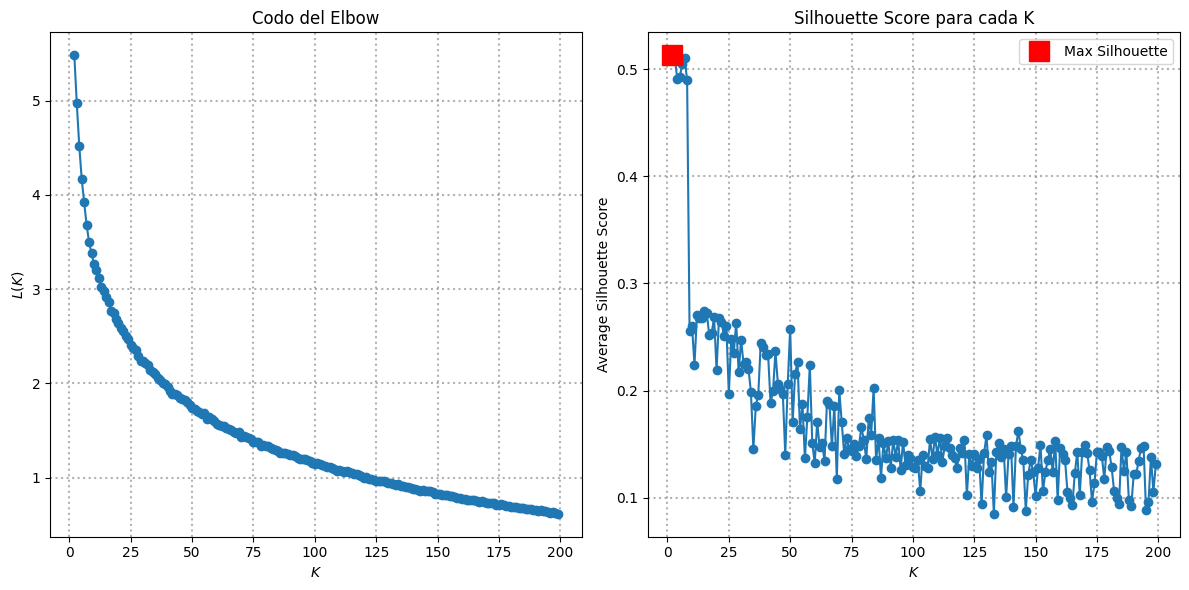

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Definir los valores de K para probar
K_list = range(2, 200)

L = []  # Lista para almacenar el "Elbow"
SC = []  # Lista para almacenar los "Silhouette Scores"

# Ajustar KMeans para diferentes valores de K
for k in K_list:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(wv.vectors)  # Usar los vectores de palabras
    L.append((kmeans.inertia_)/(wv.vectors.shape[0]))  # Calcular el valor del "Elbow"
    y_kmeans = kmeans.predict(wv.vectors)  # Predecir los clusters
    SC.append(silhouette_score(wv.vectors, y_kmeans))  # Calcular el "Silhouette Score"

# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico del "Elbow"
ax[0].plot(K_list, L, '-o')
ax[0].set_xlabel('$K$')
ax[0].set_ylabel('$L(K)$')
ax[0].set_title('Codo del Elbow')
ax[0].grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

# Gráfico de "Silhouette Score"
ax[1].plot(K_list, SC, '-o')
ax[1].plot(K_list[np.argmax(SC)], np.max(SC), 'rs', ms=15, label='Max Silhouette')
ax[1].set_xlabel('$K$')
ax[1].set_ylabel('Average Silhouette Score')
ax[1].set_title('Silhouette Score para cada K')
ax[1].grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax[1].legend()

plt.tight_layout()
plt.show()




### 6.2. Summarizer

Como en el enunciado se nos indica, hemos decidido tambien extendernos haciendo un resumidor en español, *summarizer*, que nos permita reducir las extensiones de las variables textuales. En este caso y como se nos indica, lo hemos realizado para la variable `directions`.

Primero tomamos un número pequeño de recetas para poder manejar bien el resumidor. Concatenamos los pasos y limitamos su longitud para evitar problemas con la RAM.

Definimos las funciones para dividir y resumir los textos. Y por último lo inicializamos.

In [ ]:
from transformers import pipeline

# Inicializar el pipeline en GPU si está disponible
device = 0 if torch.cuda.is_available() else -1

# Inicializar el pipeline para summarization
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=device)

datos_subset = datos.head(20)

# Concatenar los pasos de cada receta en un solo string
recipes_text = datos_subset['directions'].apply(lambda steps: " ".join(steps))
recipes_text = recipes_text.dropna()
recipes_text = recipes_text[recipes_text.str.strip() != ""]
recipes_text = recipes_text[recipes_text.str.len() < 1024 * 10]  # Limitar a 10MB de longitud

# Función para dividir un texto en fragmentos más pequeños
def split_text(text, max_chunk_length=1024):
    """
    Divide un texto largo en fragmentos más pequeños compatibles con el modelo.

    Args:
        text (str): Texto a dividir.
        max_chunk_length (int): Longitud máxima de cada fragmento.

    Returns:
        list: Lista de fragmentos de texto.
    """
    words = text.split()
    if not words:  # Si el texto está vacío, retorna una lista vacía
        return []
    chunks = [' '.join(words[i:i + max_chunk_length]) for i in range(0, len(words), max_chunk_length)]
    return chunks

# Función para resumir una receta
def summarize_recipe(recipe):
    try:
      # Dividir receta en fragmentos si es necesario
      chunks = split_text(recipe)
      if not chunks:  # Si no hay fragmentos, retorna un resumen vacío
          return ""
      # Generar resúmenes para cada fragmento
      chunk_summaries = [summarizer(chunk,
                                    max_length=min(len(chunk.split()), 50),  # Ajustar max_length dinámicamente
                                    min_length=10,
                                    do_sample=False)[0]['summary_text']
                        for chunk in chunks]
      # Combinar resúmenes
      return " ".join(chunk_summaries)

    except Exception as e:
        with open("errores.log", "a") as f:
            f.write(f"Error procesando receta: {recipe[:100]}... - {e}\n")
        return "Error al generar resumen"

summaries = recipes_text.apply(summarize_recipe)

# Imprimir los resúmenes
for i, summary in enumerate(summaries):
    print(f"Original Text {i+1}: {recipes_text[i]}")
    print(f"Summary {i+1}: {summary}\n")


Original Text 1: 1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool. 2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper. 3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.
Summary 1: Lentils, celery, carrot, thyme, salt, and stock are added to a saucepan. simmer until lentils are tender, about 30 minutes. 

Los resultados son muy favorables, ya que tenemos los textos resumidos en gran medida y sin perder una gran cantidad de información. Aunque sí es verdad que hay pequeños datos que se pierden como la temperatura en algunos casos.